In [388]:
#Import library yang dibutuhkan untuk proses klasifikasi
import pandas as pd
import numpy as np
import string #library untuk bekerja dengan text
import re #import modul regular expression # regex untuk membersihkan kata kata tweet

In [387]:
#Import data CSV hasil dari proses pre-processing dan penghapusan data ganda yang ingin diproses dalam tahapan klasifikasi
# header_list = ["text","label"]
# data_label = pd.read_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/psbb (fix-2k)/4-fix/seimbang_2-pre-udhnegasi.csv', names=header_list)
# data_label

header_list = ["text","label"]
data_label = pd.read_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/psbb (fix-2k)/4-fix/seimbang_2-pre-blmnegasi.csv', names=header_list)
data_label

,text,label
0,lockdown tidak jalan ekonomi mati,0
1,amin moga cepat psbb terap vaksin covid temu r...,1
2,ekonomi teriak lockdown selamat jalan lambat t...,1
3,cepat rencana mitigasi pemerintah buka ekonomi...,1
4,psbb tidak gantung sadar disiplin taat larang ...,1
...,...,...
1995,psbb dukung pemerintah relaksasi total anies b...,1
1996,disiplin psbb total tidak perlu masker hindar ...,1
1997,resesi kwartal anies dukung alas kalang sayang...,1
1998,selamat psbb total tidak perlu disiplin masker...,1


In [300]:
label_count = data_label['label'].value_counts()
label_count

0    1258
1     742
Name: label, dtype: int64

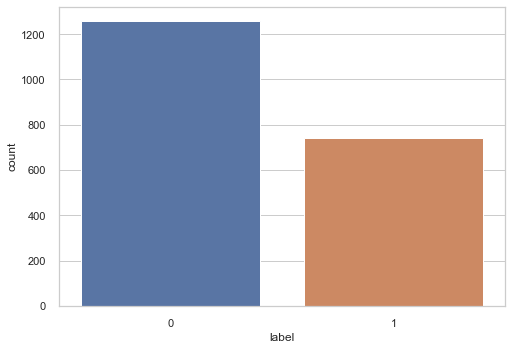

In [301]:
#from pandas.testing import assert_frame_equal
import matplotlib.pyplot as plt
import seaborn as sns
#Univariate analysis label
#label = ['negatif','positif']
sns.set(style="whitegrid")
sns.countplot(data_label['label'])

#sns.legend(labels=['Men', 'Women'])

#plt.savefig(bar_count_label.png)

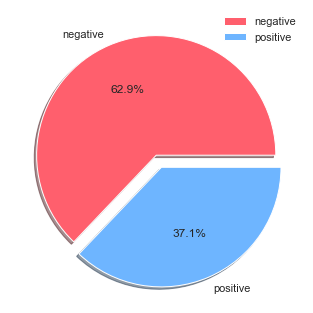

In [443]:
#Data to plot
# labels = ['negative','positive']
# colors = ("#FF968A","#6EB5FF")

labels = ['negative','positive']
colors = ("#FF5F6D","#6EB5FF")

explode = (0.01,0.1) #explode 1st slice

#plot
fig,ax = plt.subplots()
ax.pie(data_label.label.value_counts(), labels=labels, autopct='%.1f%%', explode=explode, shadow=True, colors=colors)
ax.legend(labels,loc='best')
ax.set_aspect('equal')
plt.tight_layout
plt.show()

#plt.savefig('pie.png')

In [303]:
df = data_label[data_label['label']== 0]
df.head()

,text,label
0,lockdown tidak_jalan ekonomi mati,0
89,tuju bu risma roda ekonomi surabaya gerak prot...,0
110,ekonomi lambat bijak psbb akibat pandemi virus...,0
113,psbb nyata pribadi dukung penuh bijak dampak e...,0
114,ekonomi massal tidak_hancur bijak new normal p...,0


In [304]:
df = data_label[data_label['label']== 1]
df.head()

,text,label
1,amin moga cepat psbb terap vaksin covid temu r...,1
2,ekonomi teriak lockdown selamat jalan lambat t...,1
3,cepat rencana mitigasi pemerintah buka ekonomi...,1
4,psbb tidak_gantung sadar disiplin taat larang ...,1
5,lebaran suruh tidak_mudik butuh jamin tolong e...,1


In [389]:
#Import library untuk melakukan proses klasifikasi, validasi maupun evaluasi
from time import time #untuk proses perhitungan waktu komputasi
from sklearn.model_selection import GridSearchCV #untuk proses penyetelan parameter
from sklearn.pipeline import Pipeline #untuk menampung beberapa tahapan untuk proses klasifikasi yang dimana pembelajaran 
#mesin dapat berjalan otomatis secara bersama berurutan bergantian tetapi dalam tahap berbeda.
from sklearn.feature_extraction.text import TfidfVectorizer #untuk proses pembobotan kata dengan pemberian bobot nilai kepada 
#sebuah kata dengan melihat frekuensi relatif kemunculan kata dalam dokumen teks
from sklearn.naive_bayes import BernoulliNB #untuk proses klasifikasi dalam algorirma Naive Bayes varian Bernoulli Naive Bayes
from sklearn.svm import SVC #untuk proses klasifikasi dalam algoritma SVM
from sklearn.neighbors import KNeighborsClassifier #untuk proses klasifikasi dalam algoritma K-NN
from sklearn.model_selection import train_test_split #untuk proses pembagian data training maupun testing
from sklearn.model_selection import KFold #Untuk proses KFoldValidation
from sklearn.model_selection import cross_val_score #untuk proses validasi dengan nilai perulangan sesuai nilai K
from sklearn import metrics 
from sklearn.metrics import classification_report #untuk proses menampilkan evaluasi
from sklearn.metrics import accuracy_score #untuk proses menampilkan hasil akurasi dari proses model klasifikasi
from sklearn.metrics import precision_recall_curve #untuk proses menampilkan hasil presisi dan recall dari proses model klasifikasi
from sklearn.metrics import f1_score #untuk proses menampilkan hasil f1-score dari proses model klasifikasi
from sklearn.metrics import roc_curve, auc #untuk proses menampilkan hasil Area Hitung di Bawah Kurva Karakteristik Operasi 
#Penerima (AUC ROC) dari skor prediksi.

In [17]:
#Proses untuk pembagian dataset training dan testing

#Membangun One-dimensional array dan N-dimensional array dengan nilai random. 
#Gunakan fungsi np.random.randint(batas atas, size=dimensi array)

#np.random.randint(low, high=None, size=None, dtype=int)
#Fungsi untuk melakukan pengambilan sampel secara acak di numpy
#Membuat variabel index yang berguna untuk menghilangkan index pada data
idx = np.random.randint(0,2000,2000)

#.loc = membaca baris berdasarkan index
reduce_data = data_label.loc[idx] 
"""
Membaca setiap baris data yang ada di dataframe data label berdasarkan hasil pengacakan pada variabel idx yang sudah melakukan 
pengambilan sampel secara acak, kemudian dari proses tersebut disimpan lagi di dalam dataframe reduce_data
"""
data_train,data_test=train_test_split(reduce_data,test_size = 0.2) 
"""
Membagi data dengan menggunakan fungsi train_test_split yang dimana parameter masukan berisi dataframe
reduce_data=data yang sudah dibaca perbarisnya, serta ukuran pembagian datanya, disini 0.2 artinya 
pembagian data menghasilkan data testing sebanyak 20% dan sisanya data training. Data tersebut akan 
disimpan ke dalam variabel data_train dan data_test yang dimana 
"""
#Menetapkan isi dari variabel train dan test yang termasuk isi dari data training dan testing dalam bentuk list
train = data_train[['text','label']].reset_index().drop('index',axis=1)
test = data_test[['text','label']].reset_index().drop('index',axis=1)
#Menggunakan fungsi drop () untuk mengambil semua data lainnya di index. Kemudian, dibagi datanya.

#Menyimpan hasil pembagian data training dan testing ke file format CSV dengan tanpa judul dan index
train.to_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/data-train_2_coba.csv', header=None, index=False)
test.to_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/data-test_2_coba.csv', header=None, index=False)

In [390]:
#Proses import data split yang sudah dipisahkan sebelumnya untuk diolah pada proses model klasifikasi
header_list = ["text","label"]
train = pd.read_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/pprocessing-2080/2080/data-train_2_pre.csv', names=header_list)
test = pd.read_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/pprocessing-2080/2080/data-test_2_pre.csv', names=header_list)

# header_list = ["text","label"]
# train = pd.read_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/data-train_2.csv', names=header_list)
# test = pd.read_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/data-test_2.csv', names=header_list)

In [391]:
"""
Proses mendefinisikan atau seleksi kolom yang menjadi prediktor maupun output ke dalam variabel X dan y dalam set pelatihan
maupun pengujian yang dimana dari kedua variabel tersebut memiliki peran sebagai variabel independen dan dependen untuk proses
klasifikasi

Set pelatihan adalah bagian dari kumpulan data yang digunakan untuk melatih model. 
=>X_train adalah kumpulan data pelatihan. Variabel ini termasuk kedalam variabel independen.
=>y_train adalah kumpulan label untuk semua data di X_train. Termasuk variabel dependen yang perlu diprediksi oleh model, 
seperti termasuk label kategori terhadap variabel independen yang ada, oleh karna itu perlu menentukan variabel dependen 
saat melatih / menyesuaikan model.

Set pengujian adalah subset dari kumpulan data yang Anda gunakan untuk menguji model Anda setelah model melalui pemeriksaan
awal oleh set validasi.
=>X_test adalah kumpulan data pengujian. Variabel ini termasuk kedalam variabel independen. 
Variabel independen dari data yang tidak akan digunakan dalam tahap pelatihan dan akan digunakan untuk membuat prediksi 
guna menguji keakuratan model
=>y_test adalah kumpulan label untuk semua data di X_test. Label ini akan digunakan untuk menguji akurasi antara kategori 
aktual dan prediksi

"""
X_train = train.text #data file train dengan kolom text
y_train = train.label #data file train dengan kolom label
X_test = test.text #data file test dengan kolom text
y_test = test.label #data file text dengan kolom label

### --- Proses Hyperparameters Tuning BNB ---

Proses ini digunakan untuk menyesuaikan hyperparameter untuk mengoptimalkan kinerja algoritma.
Proses Hyperparameter tuning ini dijalankan dengan bantuan sistem pipeline yang dimana tujuan sistem pipeline ini untuk mengumpulkan beberapa langkah yang dapat divalidasi silang bersama-sama sambil menetapkan parameter yang berbeda.

In [308]:
"""
Tentukan pipeline yang berisi metode mana yang digunakan yang nantinya akan diproses untuk menjadi model terbaik dengan
menggabungkan ekstraktor fitur teks dengan pengklasifikasi sederhana.

Disini pipeline berisi estimator dari beberapa metode algoritma yang digunakan untuk menampung semua fitur ekstraksi maupun 
fitur dari metode algoritma yang akan di ujikan satu sama lain pada proses penyetelan dengan pendekatan GridSearchCV.
"""
text_clf_bnb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', BernoulliNB())])

"""
Proses penyetelan menggunakan hyperparameter utama pada setiap metode algoritma. Banyak parameter yang dicoba akan memberikan
daya penjelajahan yang lebih baik tetapi akan meningkatkan waktu pemrosesan dengan cara kombinatorial.

Pada metode algoritma Naive Bayes varian BernoulliNB ini menggunakan pencarian nilai terbaik dari hyperparameter binarize
dan alpha, kemudian untuk ekstraksi fitur kata menggunakan dari TFIDFVectorizer dengan pemilihan nilai hyperparameter
ngram_range
"""

"""
Pipeline ini dilakukan dengan cara memungkinkan pengaturan parameter dari berbagai langkah menggunakan nama mereka dan nama 
parameter yang dipisahkan dengan penulisan __ seperti pada contoh di bawah ini. Estimator langkah dapat diganti seluruhnya 
dengan mengatur parameter dengan namanya ke estimator lain.
"""

tuned_parameters_bnb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
#    'clf__binarize' : [0.0,0,5,0.6,1.0,1.5],
    'clf__alpha': [1, 1e-1, 1e-2, 1e-3, 1e-4]
}

### Tahapan pengujian setiap nilai parameter untuk mencari mana yang terbaik, prosesnya terjadi di dalam Grid

In [309]:
t = time()

"""
Tahapan proses mencari nilai dari hyperparameter setiap algoritma menggunakan GridSearchCV untuk mendapatkan kombinasi parameter
terbaik dengan gabungan fitur lainnya selain pengklasifikasian
"""

#Melakukan validasi sebanyak 10 kali untuk masing-masing nilai pada parameter alpha
cv = KFold(n_splits=10, shuffle=True, random_state=1)

#Membuat objek clf_bnb sebagai fungsi dari proses GridsearchCV
clf_bnb = GridSearchCV(text_clf_bnb, tuned_parameters_bnb, scoring = 'accuracy', cv=cv, n_jobs = -1,return_train_score=True)

#Sesuaikan dengan model/Masukkan ke model/Fit the model
#Fitting model dimana model belajar untuk mencari hubungan antara X_train dan y_train 
clf_bnb.fit(X_train,y_train)

print("Hasil Score data test : ", clf_bnb.score(X_train,y_train))
print("Hasil Score data test : ", clf_bnb.score(X_test,y_test))

training_time = time() - t
print("Waktu Komputasi dari proses hyperparameter tuning di dalam Grid: %0.3fs" % training_time)

Hasil Score data test :  0.995
Hasil Score data test :  0.955
Waktu Komputasi dari proses hyperparameter tuning di dalam Grid: 6.614s


In [310]:
"""
Proses menampilkan setiap kombinasi nilai hyperparameter dari proses pengujian sebelumnya, hal ini memudahkan untuk melihat 
setiap alur dari pencocokan berlangsung yang dimana hasil akhir berupa nilai terbaik dari kombinasi antar beberapa estimator
(seperti pemilihan fitur) yang diujikan pada 1 set penyetelan dalam sistem pipeline.
"""

print("Best parameters set found on development set:")
print(clf_bnb.best_params_)
print("Best Score:", clf_bnb.best_score_)
print('\n')

means = clf_bnb.cv_results_['mean_test_score'] #nilai rata rata akurasi
stds = clf_bnb.cv_results_['std_test_score'] #nilai standar deviasi
params = clf_bnb.cv_results_['params'] #nilai-nilai param yang sudah didefinisikan ke opsi pengujian sebelumnya (text_clf_bnb,
#tuned_parameters_bnb yang dimana ditampilkan dalam bentuk berupa pencocokan secara satu-persatu

#Proses perulangan untuk menampilkan nilai-nilai tersebut
for mean, stdev, param in zip(means,stds,params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean,stdev,param))
    

Best parameters set found on development set:
{'clf__alpha': 0.1, 'tfidf__ngram_range': (1, 2)}
Best Score: 0.9287500000000002


Mean: 0.873125 Stdev:(0.016548) with: {'clf__alpha': 1, 'tfidf__ngram_range': (1, 1)}
Mean: 0.899375 Stdev:(0.027308) with: {'clf__alpha': 1, 'tfidf__ngram_range': (1, 2)}
Mean: 0.881875 Stdev:(0.036917) with: {'clf__alpha': 1, 'tfidf__ngram_range': (1, 3)}
Mean: 0.906250 Stdev:(0.010078) with: {'clf__alpha': 0.1, 'tfidf__ngram_range': (1, 1)}
Mean: 0.928750 Stdev:(0.014843) with: {'clf__alpha': 0.1, 'tfidf__ngram_range': (1, 2)}
Mean: 0.927500 Stdev:(0.020194) with: {'clf__alpha': 0.1, 'tfidf__ngram_range': (1, 3)}
Mean: 0.906250 Stdev:(0.018329) with: {'clf__alpha': 0.01, 'tfidf__ngram_range': (1, 1)}
Mean: 0.926875 Stdev:(0.022369) with: {'clf__alpha': 0.01, 'tfidf__ngram_range': (1, 2)}
Mean: 0.921250 Stdev:(0.024875) with: {'clf__alpha': 0.01, 'tfidf__ngram_range': (1, 3)}
Mean: 0.900625 Stdev:(0.021000) with: {'clf__alpha': 0.001, 'tfidf__ngram_range': 

In [311]:
"""
Meringkas hasil dari GrisSearchCV
Menampilkan hasil setiap pencocokan parameter dari proses GridSearchCV beserta nilai pelatihan dan pengujian dari setiap 
kombinasi dalam bentuk DataFrame yang isinya berupa pasangan kombinasi tiap hyperparameter yang diujikan.
"""
result_bnb = pd.DataFrame(clf_bnb.cv_results_['params'])
result_bnb['test_score'] = clf_bnb.cv_results_['mean_test_score']
result_bnb['train_score'] = clf_bnb.cv_results_['mean_train_score']
result_bnb

,clf__alpha,tfidf__ngram_range,test_score,train_score
0,1.0000,"(1, 1)",0.873125,0.924931
1,1.0000,"(1, 2)",0.899375,0.967431
2,1.0000,"(1, 3)",0.881875,0.968056
3,0.1000,"(1, 1)",0.906250,0.962014
4,0.1000,"(1, 2)",0.928750,0.994931
5,0.1000,"(1, 3)",0.927500,0.995625
6,0.0100,"(1, 1)",0.906250,0.966111
7,0.0100,"(1, 2)",0.926875,0.996181
8,0.0100,"(1, 3)",0.921250,0.997153
9,0.0010,"(1, 1)",0.900625,0.968194


In [964]:
import joblib
final_model = clf_bnb.best_estimator_
joblib.dump(final_model, "clf_bnb.pkl")

['clf_bnb.pkl']

### --- Proses Hyperparameters Tuning Selesai ---

### Proses Pemodelan BNB

-> Pipeline dapat digunakan untuk menghubungkan beberapa estimator menjadi satu. Ini berguna karena sering sekali ada urutan langkah yang tetap dalam memproses data, misalnya pemilihan fitur, normalisasi, dan klasifikasi.

-> Dalam pipeline ini pemilihan parameter dapat dilakukan bersama dengan pencarian grid atas parameter semua estimator dalam satu sistem pipeline sekaligus. Sistem ini dibuat menggunakan daftar pasangan (key, value), di mana kuncinya adalah string yang berisi nama yang ingin diberikan dan nilainya adalah objek penaksir yang berisi nilai parameter di dalamnya.

In [471]:
t = time()

#Proses melatih model
#Mengaktifkan/memanggil/membuat fungsi klasifikasi Bernoulli Naive Bayes dengan pemilihan fitur yang akan digunakan
#Dalam proses ini hasil nilai setiap parameter didapat dari proses sebelumnya setelah melakukan proses pencocokan atau
#kombinasi, yaitu proses hyperparameter tuning. 
bnb = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))),
                ('clf', BernoulliNB(alpha=0.1))])

"""
Sesuaikan dengan model/Masukkan ke model/Fit the model. Memasukkan data training pada fungsi klasifikasi BNB.
Masukan dalam bentuk parameter yang berisi X_train (kumpulan data pelatihan yang bersifat independen), y_train (kumpulan label 
untuk semua data di X_train yang bersifat dependen yang perlu diprediksi oleh model)

Cocokkan semua transformasi satu demi satu dan transformasikan data, kemudian set data yang ditransformasi menggunakan 
estimator akhir.
"""
# Fitting model dimana model belajar untuk mencari hubungan antara X_train dan y_train 
bnb.fit(X_train,y_train)

#Untuk set waktu selama proses training sedang berjalan
training_time = time() - t
print("train time: %0.3fs" % training_time)

print("================================")
print("Hasil Score data train : ", bnb.score(X_train,y_train))
print("Hasil Score data test : ", bnb.score(X_test,y_test))

train time: 0.081s
Hasil Score data train :  0.995
Hasil Score data test :  0.955


In [472]:
"""
Set validasi adalah subset dari kumpulan data (terpisah dari set pelatihan) yang Anda gunakan untuk menyesuaikan 
hyperparameter.

Proses pelatihan model/Training the model dengan menggunakan nilai validasi sebanyak 10 pembagian data yang bekerja secara acak
dengan membagi 10 bagian secara rata dengan jumlah data yang sama. Selanjutnya dilakukan proses silang, dimana data training 
dijadikan data testing dan sebaliknya, proses ini diulang sebanyak 10 kali pada training set yang berbeda. 

Rata-rata perkiraan nilai dari 10-fold cross validation digunakan untuk menghasilkan perkiraan keseluruhan. 

"""

"""
Setelah tahapan melatih model, langkah selanjutnya adalah hasil pelatihan model tersebut di evaluasi untuk melihat seberapa 
bagus kinerja dari model tersebut dengan memvalidasi terlebih dahulu kemudian dilakukan proses testing menggunakan data testing 
yang sudah disediakan sebelumnya.
"""
#Melakukan validasi sebanyak 10 kali
cv = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy = cross_val_score(bnb, X_train, y_train, scoring = 'accuracy', cv=cv)
print('cross validation score', accuracy)

#Menghitung rata-rata nilai validasi silang
print('Average cross-validation Mean Score : {:.4f}'.format(accuracy.mean()))

#Menghitung rata-rata standar deviasi nilai validasi silang
print('Average cross-validation Std Score : {:.4f}'.format(accuracy.std()))

cross validation score [0.93125 0.925   0.95    0.9375  0.925   0.9125  0.925   0.91875 0.90625
 0.95625]
Average cross-validation Mean Score : 0.9288
Average cross-validation Std Score : 0.0148


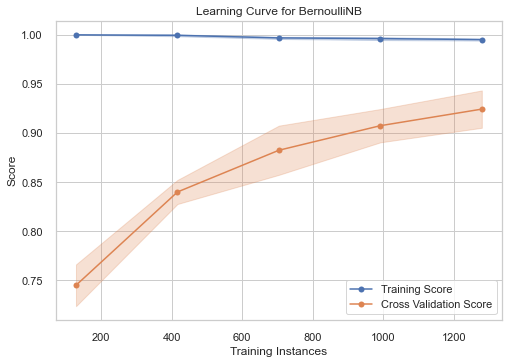

In [394]:
from yellowbrick.model_selection import LearningCurve

#Buat contoh model pengelompokan dan visualizer
visualizer = LearningCurve(bnb, scoring="accuracy")

visualizer.fit(X_train, y_train) #Masukkan data ke visualisator
visualizer.show() #Tampilkan gambar

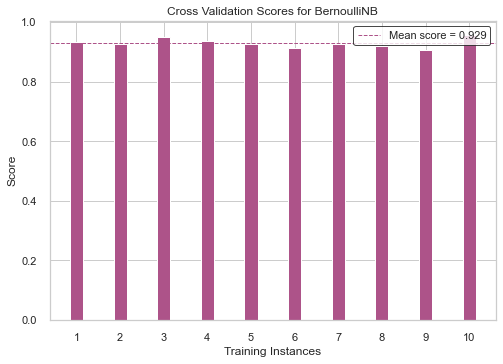

In [395]:
#Visualisasi untuk nilai setiap literasi dalam proses Validasi Silang di algoritma BNB
#!pip install yellowbrick
from yellowbrick.model_selection import CVScores
import warnings

warnings.filterwarnings('ignore')

cv = KFold(n_splits=10, shuffle=True, random_state=1)
visualizer = CVScores(bnb, cv=cv, scoring='accuracy',color="#ad5389")

visualizer.fit(X_train,y_train)
visualizer.show()

In [473]:
"""
Perhitungan nilai evaluasi dihasilkan setelah proses validasi, yang dimana dari proses pelatihan, divalidasi dengan data 
testing yang sudah disiapkan kemudian menghasilkan nilai evaluasi seperti classification report atau metrik performa akurasi, 
presisi, recall, f1-score
"""

#Waktu komputasi untuk testing data
t = time()
test_time = time() - t

print("test time:  %0.3fs" % test_time)
print("========================")

#Menentukan hasil prediksi dari X_test
#get predictions from model
y_pred_bnb = bnb.predict(X_test)

"""
Setelah proses klasifikasi selesai, diperlukan adanya evaluasi untuk menentukan kualitas metode yang telah berhasil dibuat pada 
tahap sebelumnya. Pada tahap evaluasi ini metrik performa accuracy, precision, recall, dan F1-Score akan digunakan untuk menguji 
kinerja proses klasifikasi yang ditampilkan melalui function classification_report dimana berisi parameter masukan yaitu y_test
(kumpulan label dari semua data di X_test;data pengujian) dan y_pred_bnb (proses prediksi kumpulan data pengujian (X_test) yang
bersifat variabel independen)
"""
# Classify and report the results
print(classification_report(y_test, y_pred_bnb))
print('\n')

#print('BEST BERNOULLI NAIVE BAYES MODEL')
print('Accuracy Score - Bernoulli NB:', metrics.accuracy_score(y_test, y_pred_bnb)) 

test time:  0.000s
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       259
           1       0.92      0.95      0.94       141

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.96      0.95      0.96       400



Accuracy Score - Bernoulli NB: 0.955


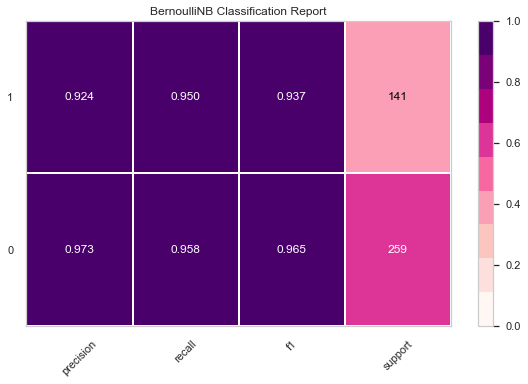

In [397]:
#Library untuk menampilkan laporan evaluasi model klasifikasi dalam bentuk visualisasi agar lebih mudah dipahami
from yellowbrick.classifier import ClassificationReport

#Buat contoh model pengelompokan dan visualizer
visualizer = ClassificationReport(bnb,support=True,cmap='RdPu')

visualizer.fit(X_train, y_train)  #Sesuaikan visualisator dan modelnya
visualizer.score(X_test, y_test)  #Evaluasi model pada data pengujian
visualizer.show()

,negatif,positif,accuracy,macro avg,weighted avg
precision,0.972549,0.924138,0.955,0.948343,0.955484
recall,0.957529,0.950355,0.955,0.953942,0.955000
f1-score,0.964981,0.937063,0.955,0.951022,0.955140
support,259.000000,141.000000,0.955,400.000000,400.000000


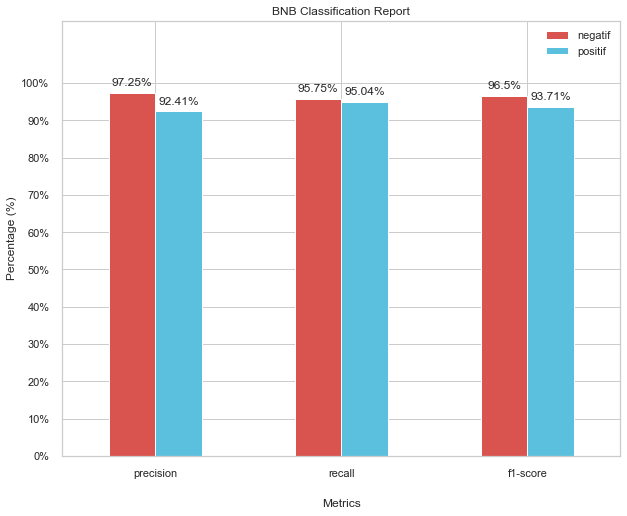

In [474]:
#Import library untuk visualisasi gambar
import matplotlib.pyplot as plt

"""
Variabel ini digunakan untuk menampung nama label yang digunakan dalam kolom untuk confusion matrix dan berfungsi sebagai tanda
label di bagian visualisasi dari classification report
"""
target_labels = ['negatif', 'positif']

#store the classification report as a dictionary
cr_dict = classification_report(y_test, y_pred_bnb, target_names=target_labels, output_dict=True)

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame(cr_dict)
display(cr_data)

#plot the classification report scores
ax=cr_data.iloc[:-1, :2].plot.bar(figsize=(10,8),color=['#d9534f','#5bc0de'])
plt.title("BNB Classification Report")
plt.xlabel('Metrics', labelpad=20)

#fix the x-ticktek mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Percentage (%)')
plt.margins(0.2,0.2)

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        ha='center',
    )

In [475]:
header_list = ["text","label"]
predict_bnb = pd.read_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/pprocessing-2080/2080/data-test_2_pre.csv',names=header_list)
predict_bnb["prediction"]=y_pred_bnb
predict_bnb.head()

#Proses untuk menyimpan hasil prediksi dari proses klasifikasi model
#predict_bnb.to_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/pprocessing-2080/2080/hasil-prediksi-bnb_2-pre.csv',index = False, header=None)

,text,label,prediction
0,psbb arti getar ekonomi dki niat jahat sikm ti...,0,0
1,jerit psbb terap rugi ekonomi segment bro rasa...,0,0
2,pikir bodoh transisi curva landai dampak,0,0
3,psbb total jokowi angguk sehat ekonomi citra a...,0,0
4,netizen pengaruh tidak tuju psbb total gubernu...,0,0


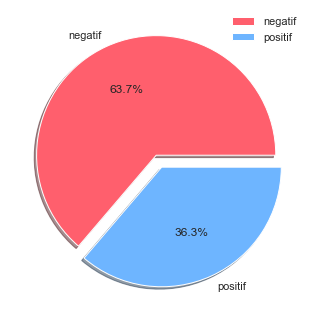

In [476]:
#Tahapan ini digunakan untuk menampilkan hasil data ke visualisasi agar mudah dibaca

#Definisi variabel awal untuk komponen yang digunakan dalam visualisasi
labels = ['negatif','positif']
colors = ("#FF5F6D","#6EB5FF")
explode = (0.01,0.1) #explode 1st slice

#Proses plot data ke visualisasi
fig,ax = plt.subplots()
ax.pie(predict_bnb.prediction.value_counts(), labels=labels, autopct='%.1f%%', explode=explode, shadow=True, colors=colors)
ax.legend(labels,loc='best')
ax.set_aspect('equal')
plt.tight_layout
plt.show()

#plt.savefig('pie.png') #untuk menyimpan visualisasi data plot

In [477]:
from sklearn.metrics import confusion_matrix
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
print(cm_bnb)

[[248  11]
 [  7 134]]


In [402]:
"""

"""
#Fungsi untuk menghitung metrik performa sensitivity dan specificity dalam proses klasifikasi
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_bnb == 1) & (actual_pos)
    false_pos = (y_pred_bnb == 1) & (actual_neg)
    true_neg = (y_pred_bnb == 0) & (actual_neg)
    false_neg = (y_pred_bnb == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy_bnb = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity_bnb = np.sum(true_pos) / np.sum(actual_pos)
    specificity_bnb = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity_bnb, specificity_bnb, accuracy_bnb

In [403]:
#Proses perhitungan dengan memanggil fungsi sebelumnya
sensitivity_bnb, specificity_bnb, accuracy_bnb = calculate_sensitivity_specificity(y_test, y_pred_bnb)
print ('Sensitivity:', sensitivity_bnb)
print ('Specificity:', specificity_bnb)
print ('Accuracy:', accuracy_bnb)

Sensitivity: 0.950354609929078
Specificity: 0.9575289575289575
Accuracy: 0.955


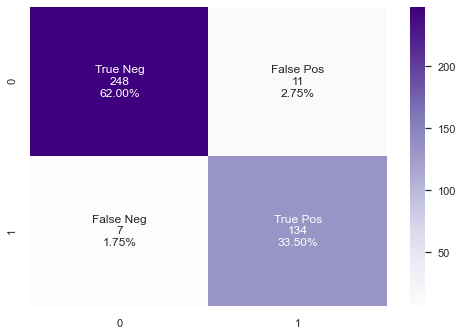

In [404]:
#Visualisasi Confusion Matrix dari model klasifikasi BNB
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_bnb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_bnb.flatten()/np.sum(cm_bnb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_bnb, annot=labels, fmt='', cmap='Purples')

In [405]:
#auc dan roc turunan dari precision
auc_roc_bnb=metrics.roc_auc_score(y_test,y_pred_bnb)
auc_roc_bnb

0.9539417837290178

In [406]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_bnb)
roc_auc_bnb = auc(false_positive_rate, true_positive_rate)
roc_auc_bnb

0.9539417837290178

Text(0.5, 0, 'False Positive Rate')

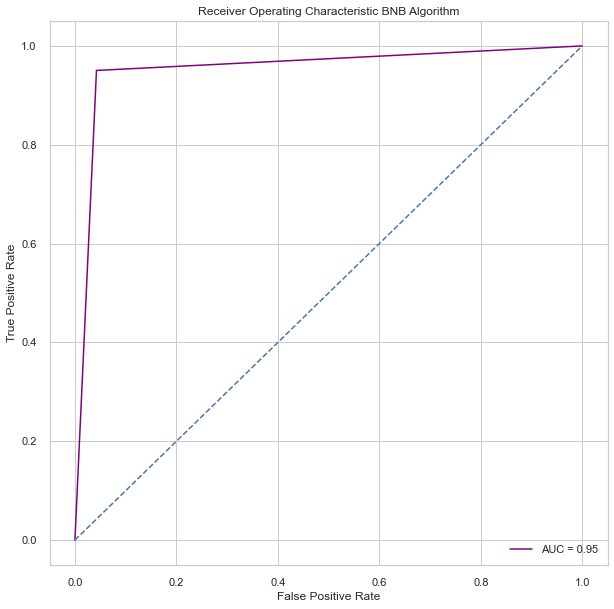

In [407]:
#Visualisasi Kurva ROC dan AUC
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic BNB Algorithm')
plt.plot(false_positive_rate,true_positive_rate, color='purple',label = 'AUC = %0.2f' % roc_auc_bnb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### --- Proses Hyperparameters Tuning SVM ---
Proses ini digunakan untuk menyesuaikan hyperparameter untuk mengoptimalkan kinerja algoritma. Proses Hyperparameter tuning ini dijalankan dengan bantuan sistem pipeline yang dimana tujuan sistem pipeline ini untuk mengumpulkan beberapa langkah yang dapat divalidasi silang bersama-sama sambil menetapkan parameter yang berbeda.

In [328]:
"""
Tentukan pipeline yang berisi metode mana yang digunakan yang nantinya akan diproses untuk menjadi model terbaik dengan
menggabungkan ekstraktor fitur teks dengan pengklasifikasi sederhana.
Disini pipeline berisi estimator dari beberapa metode algoritma yang digunakan untuk menampung semua fitur ekstraksi maupun 
fitur dari metode algoritma yang akan di ujikan satu sama lain pada proses penyetelan dengan pendekatan GridSearchCV.
"""
text_clf_svm = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', SVC())])

"""
Proses penyetelan menggunakan hyperparameter utama pada setiap metode algoritma. Banyak parameter yang dicoba akan memberikan
daya penjelajahan yang lebih baik tetapi akan meningkatkan waktu pemrosesan dengan cara kombinatorial.

Pada metode algoritma Support Vector Machine ini menggunakan pencarian nilai terbaik dari hyperparameter C dan kernel, 
kemudian untuk ekstraksi fitur kata menggunakan dari TFIDFVectorizer dengan pemilihan nilai hyperparameter ngram_range
"""

"""
Pipeline ini dilakukan dengan cara memungkinkan pengaturan parameter dari berbagai langkah menggunakan nama mereka dan nama 
parameter yang dipisahkan dengan penulisan __ seperti pada contoh di bawah ini. Estimator langkah dapat diganti seluruhnya 
dengan mengatur parameter dengan namanya ke estimator lain.
"""

tuned_parameters_svm = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': [0.5,1.0,1.5,2.0,2.5,3.0],
    'clf__kernel' : ['linear','rbf','sigmoid','poly'],
    'clf__class_weight' : ['balanced']
}

### Tahapan pengujian setiap nilai parameter untuk mencari mana yang terbaik, prosesnya terjadi di dalam Grid

In [329]:
t = time()

"""
Tahapan proses mencari nilai dari hyperparameter setiap algoritma menggunakan GridSearchCV untuk mendapatkan kombinasi parameter
terbaik dengan gabungan fitur lainnya selain pengklasifikasian
"""
#Melakukan validasi sebanyak 10 kali
cv = KFold(n_splits=10, shuffle=True, random_state=1)

#Membuat objek clf_svm sebagai fungsi dari proses GridsearchCV
clf_svm = GridSearchCV(text_clf_svm, tuned_parameters_svm, scoring = 'accuracy',cv=cv, n_jobs = -1, return_train_score=True)

#Sesuaikan dengan model/Masukkan ke model/Fit the model
#Fitting model dimana model belajar untuk mencari hubungan antara X_train dan y_train
clf_svm.fit(X_train,y_train)

print("Hasil Score data test : ", clf_svm.score(X_train,y_train))
print("Hasil Score data test : ", clf_svm.score(X_test,y_test))

training_time = time() - t
print("Waktu Komputasi dari proses hyperparameter tuning di dalam Grid: %0.3fs" % training_time)

Hasil Score data test :  0.9975
Hasil Score data test :  0.965
Waktu Komputasi dari proses hyperparameter tuning di dalam Grid: 134.800s


#### Proses hasil setiap kombinasi nilai hyperparameter dari proses pengujian sebelumnya

In [330]:
"""
Proses menampilkan setiap kombinasi nilai hyperparameter dari proses pengujian sebelumnya, hal ini memudahkan untuk melihat 
setiap alur dari pencocokan berlangsung yang dimana hasil akhir berupa nilai terbaik dari kombinasi antar beberapa estimator
(seperti pemilihan fitur) yang diujikan pada 1 set penyetelan dalam sistem pipeline.
"""

print("Best parameters set found on development set:")
print(clf_svm.best_params_)
print("Best Score:", clf_svm.best_score_)
print('\n')

means = clf_svm.cv_results_['mean_test_score'] #nilai rata rata akurasi
stds = clf_svm.cv_results_['std_test_score'] #nilai standar deviasi
params = clf_svm.cv_results_['params'] #nilai-nilai param yang sudah didefinisikan ke opsi pengujian sebelumnya (text_clf_svm,
#tuned_parameters_svm yang dimana ditampilkan dalam bentuk berupa pencocokan secara satu-persatu

#Proses perulangan untuk menampilkan nilai-nilai tersebut
for mean, stdev, param in zip(means,stds,params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean,stdev,param))
    

Best parameters set found on development set:
{'clf__C': 1.5, 'clf__class_weight': 'balanced', 'clf__kernel': 'linear', 'tfidf__ngram_range': (1, 3)}
Best Score: 0.930625


Mean: 0.894375 Stdev:(0.015424) with: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__kernel': 'linear', 'tfidf__ngram_range': (1, 1)}
Mean: 0.914375 Stdev:(0.016548) with: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__kernel': 'linear', 'tfidf__ngram_range': (1, 2)}
Mean: 0.922500 Stdev:(0.015104) with: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__kernel': 'linear', 'tfidf__ngram_range': (1, 3)}
Mean: 0.916250 Stdev:(0.015861) with: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__kernel': 'rbf', 'tfidf__ngram_range': (1, 1)}
Mean: 0.925000 Stdev:(0.018329) with: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__kernel': 'rbf', 'tfidf__ngram_range': (1, 2)}
Mean: 0.919375 Stdev:(0.019254) with: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__kernel': 'rbf', 'tfidf__ngram_

In [331]:
"""
Meringkas hasil dari GrisSearchCV
Menampilkan hasil setiap pencocokan parameter dari proses GridSearchCV beserta nilai pelatihan dan pengujian dari setiap 
kombinasi dalam bentuk DataFrame yang isinya berupa pasangan kombinasi tiap hyperparameter yang diujikan.
"""

result_svm = pd.DataFrame(clf_svm.cv_results_['params'])
result_svm['test_score'] = clf_svm.cv_results_['mean_test_score']
result_svm['train_score'] = clf_svm.cv_results_['mean_train_score']
result_svm

,clf__C,clf__class_weight,clf__kernel,tfidf__ngram_range,test_score,train_score
0,0.5,balanced,linear,"(1, 1)",0.894375,0.955486
1,0.5,balanced,linear,"(1, 2)",0.914375,0.983056
2,0.5,balanced,linear,"(1, 3)",0.922500,0.989583
3,0.5,balanced,rbf,"(1, 1)",0.916250,0.981667
4,0.5,balanced,rbf,"(1, 2)",0.925000,0.994722
...,...,...,...,...,...,...
67,3.0,balanced,sigmoid,"(1, 2)",0.923750,0.994722
68,3.0,balanced,sigmoid,"(1, 3)",0.925000,0.996042
69,3.0,balanced,poly,"(1, 1)",0.891875,0.998889
70,3.0,balanced,poly,"(1, 2)",0.886875,1.000000


### --- Proses Hyperparameters Tuning Selesai ---

### Proses Pemodelan SVM

-> Pipeline dapat digunakan untuk menghubungkan beberapa estimator menjadi satu. Ini berguna karena sering sekali ada urutan langkah yang tetap dalam memproses data, misalnya pemilihan fitur, normalisasi, dan klasifikasi.

-> Dalam pipeline ini pemilihan parameter dapat dilakukan bersama dengan pencarian grid atas parameter semua estimator dalam satu sistem pipeline sekaligus. Sistem ini dibuat menggunakan daftar pasangan (key, value), di mana kuncinya adalah string yang berisi nama yang ingin diberikan dan nilainya adalah objek penaksir yang berisi nilai parameter di dalamnya.

In [478]:
t = time()

#Proses melatih model
#Mengaktifkan/memanggil/membuat fungsi klasifikasi Support Vector Machine dengan pemilihan fitur yang akan digunakan
#Dalam proses ini hasil nilai setiap parameter didapat dari proses sebelumnya setelah melakukan proses pencocokan atau
#kombinasi, yaitu proses hyperparameter tuning.
#Membuat objek svm sebagai fungsi dari metode Support Vector Machine yang di dalamnya menggunakan parameter yang diperoleh dari hasil grid 
svm = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,3))),
                ('clf', SVC(C=1.5, class_weight='balanced', kernel='linear'))
               ])

"""
Sesuaikan dengan model/Masukkan ke model/Fit the model. Memasukkan data training pada fungsi klasifikasi BNB.
Masukan dalam bentuk parameter yang berisi X_train (kumpulan data pelatihan yang bersifat independen), y_train (kumpulan label 
untuk semua data di X_train yang bersifat dependen yang perlu diprediksi oleh model)

Cocokkan semua transformasi satu demi satu dan transformasikan data, kemudian set data yang ditransformasi menggunakan 
estimator akhir.
"""
#Fitting model dimana model belajar untuk mencari hubungan antara X_train dan y_train 
svm.fit(X_train,y_train)

#Untuk set waktu selama proses training sedang berjalan
training_time = time() - t

print("train time: %0.3fs" % training_time)
print("================================")
print("Hasil Score data train : ", svm.score(X_train,y_train))
print("Hasil Score data test : ", svm.score(X_test,y_test))

train time: 0.451s
Hasil Score data train :  0.9975
Hasil Score data test :  0.965


In [479]:
"""
Set validasi adalah subset dari kumpulan data (terpisah dari set pelatihan) yang digunakan untuk menyesuaikan hyperparameter.
Hal ini digunakan untuk mengetahui seberapa bagus model yang dibangun pada proses sebelumnya dengan menggunakan nilai 
validasi sebanyak 10 pembagian data yang bekerja secara acak dengan membagi 10 bagian secara rata dengan jumlah data yang sama. 
Selanjutnya dilakukan proses silang, dimana data training dijadikan data testing dan sebaliknya, proses ini diulang sebanyak 10
kali pada training set yang berbeda. 

Rata-rata perkiraan nilai dari 10-fold cross validation digunakan untuk menghasilkan perkiraan keseluruhan. 

"""

"""opsi penjelasan
Setelah tahapan melatih model, langkah selanjutnya adalah hasil pelatihan model tersebut di evaluasi untuk melihat seberapa 
bagus kinerja dari model tersebut dengan memvalidasi terlebih dahulu kemudian dilakukan proses testing menggunakan data testing 
yang sudah disediakan sebelumnya.
"""
#Melakukan validasi sebanyak 10 kali
cv = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy = cross_val_score(svm, X_train, y_train, scoring = 'accuracy', cv = cv)
print('cross validation score', accuracy)

#compute average cross-validation score
print('Average cross-validation Mean Score : {:.4f}'.format(accuracy.mean()))

#compute average cross-validation score
print('Average cross-validation Std Score : {:.4f}'.format(accuracy.std()))

cross validation score [0.94375 0.925   0.93125 0.9375  0.93125 0.9125  0.93125 0.93125 0.90625
 0.95625]
Average cross-validation Mean Score : 0.9306
Average cross-validation Std Score : 0.0135


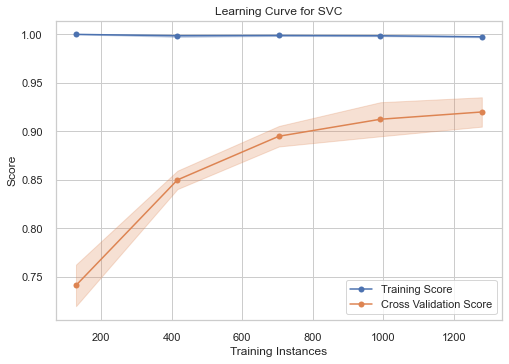

In [411]:
from yellowbrick.model_selection import LearningCurve

# Instantiate the clustering model and visualizer
visualizer = LearningCurve(svm, scoring="accuracy")

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

Filter peringatan di Python menangani peringatan (disajikan, diabaikan atau dinaikkan ke pengecualian). Filter peringatan menetapkan daftar parameter filter yang terorganisir, setiap peringatan tertentu dicocokkan pada setiap persyaratan filter di seluruh daftar sampai kecocokan dibuat, filter menentukan pengaturan kecocokan.

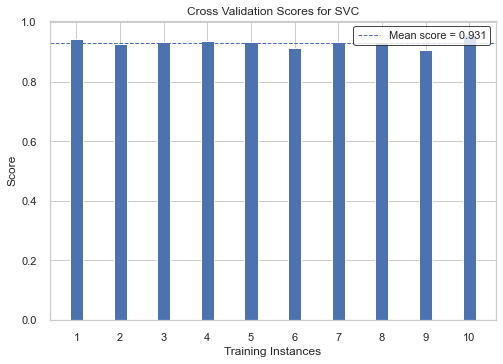

In [412]:
#Visualisasi untuk nilai setiap literasi dalam proses Validasi Silang di algoritma SVM
#!pip install yellowbrick

#Import library untuk visualisasi nilai validasi silang
from yellowbrick.model_selection import CVScores

"""
Peringatan disediakan untuk memperingatkan pengembang tentang situasi yang belum tentu merupakan pengecualian. Biasanya, 
peringatan terjadi ketika ada beberapa elemen pemrograman tertentu yang sudah usang, seperti kata kunci, fungsi atau kelas, 
dll. Peringatan dalam program berbeda dari kesalahan. Program Python segera berakhir jika terjadi kesalahan. Sebaliknya,
peringatan tidaklah penting. Ini menunjukkan beberapa pesan, tetapi program berjalan.
"""
import warnings 
#Warning Class: Ini adalah kelas super dari semua kelas kategori peringatan dan subkelas dari kelas Exception.
#ImportWarning Class: Kelas dasar untuk peringatan yang disebabkan selama proses impor modul.

warnings.filterwarnings('ignore')
#"ignore" merupakan action yang artinya jangan pernah menampilkan peringatan yang cocok
#filterwarnings(action, message=”, category=Warning, module=”, lineno=0, append=False): This function adds an entry into the 
#specifications of the warnings filter.

cv = KFold(n_splits=10, shuffle=True, random_state=1)
visualizer = CVScores(svm, cv=cv, scoring='accuracy') #Fungsi ini menambahkan entri ke dalam spesifikasi filter peringatan.
visualizer.fit(X_train,y_train)
visualizer.show()

In [480]:
"""
Perhitungan nilai evaluasi dihasilkan setelah proses validasi, yang dimana dari proses pelatihan, divalidasi dengan data 
testing yang sudah disiapkan kemudian menghasilkan nilai evaluasi seperti classification report atau metrik performa akurasi, 
presisi, recall, f1-score
"""

#Waktu komputasi untuk testing data
t = time()
test_time = time() - t

print("test time:  %0.3fs" % test_time)
print("========================")

#Menentukan hasil prediksi dari X_test
#get predictions from model 
#Selanjutnya melakukan pengujian mengenai keakuratan model SVM terhadap data yang ada, prosesnya dilakukan dengan memprediksi
#data setelah proses training yang diprediksi oleh model
y_pred_svm = svm.predict(X_test)

"""
Setelah proses klasifikasi selesai, diperlukan adanya evaluasi untuk menentukan kualitas metode yang telah berhasil dibuat pada 
tahap sebelumnya. Pada tahap evaluasi ini metrik performa accuracy, precision, recall, dan F1-Score akan digunakan untuk menguji 
kinerja proses klasifikasi yang ditampilkan melalui function classification_report dimana berisi parameter masukan yaitu y_test
(kumpulan label dari semua data di X_test;data pengujian) dan y_pred_bnb (proses prediksi kumpulan data pengujian (X_test) yang
bersifat variabel independen)
"""
# Classify and report the results
print(classification_report(y_test, y_pred_svm))
print('\n')

#print('BEST SVM MODEL')
print('Accuracy Score - SVM:', metrics.accuracy_score(y_test, y_pred_svm)) 

test time:  0.000s
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       259
           1       0.94      0.96      0.95       141

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.97      0.96      0.97       400



Accuracy Score - SVM: 0.965


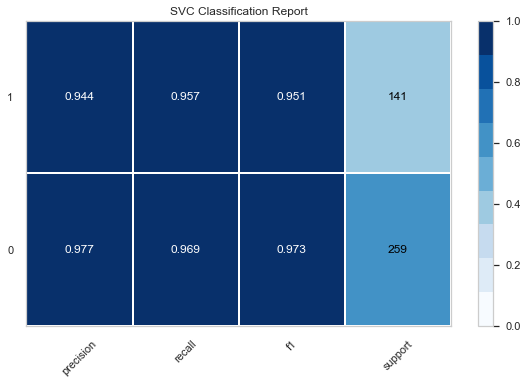

In [414]:
#Library untuk menampilkan laporan evaluasi model klasifikasi dalam bentuk visualisasi agar lebih mudah dipahami
#from yellowbrick.classifier import ClassificationReport

#Buat contoh model pengelompokan dan visualizer
visualizer = ClassificationReport(svm,support=True,cmap='Blues')

visualizer.fit(X_train, y_train)  #Sesuaikan visualisator dan modelnya
visualizer.score(X_test, y_test)  #Evaluasi model pada data pengujian
visualizer.show()

,negatif,positif,accuracy,macro avg,weighted avg
precision,0.976654,0.944056,0.965,0.960355,0.965163
recall,0.969112,0.957447,0.965,0.963279,0.965000
f1-score,0.972868,0.950704,0.965,0.961786,0.965055
support,259.000000,141.000000,0.965,400.000000,400.000000


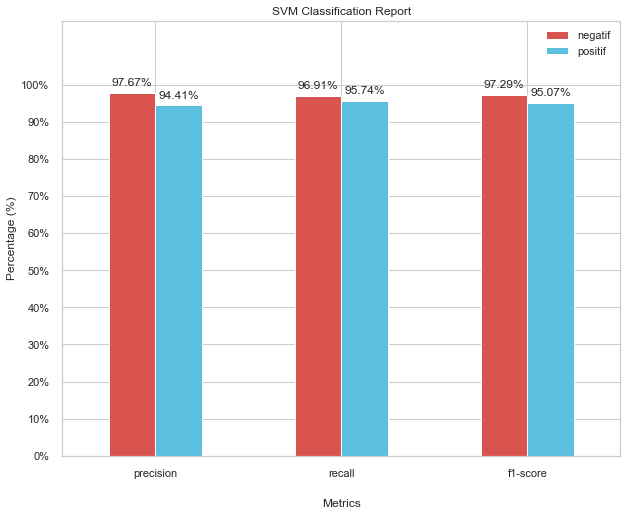

In [481]:
import matplotlib.pyplot as plt #Import library untuk visualisasi gambar

"""
Variabel ini digunakan untuk menampung nama label yang digunakan dalam kolom untuk confusion matrix dan berfungsi sebagai tanda
label di bagian visualisasi dari classification report, membuat label yang akan digunakan dan kolom untuk confusion matrix di
bagian hilir
"""
#create labels to be used and columns for a confusion matrix downstream
target_labels = ['negatif', 'positif']

#store the classification report as a dictionary
cr_dict = classification_report(y_test, y_pred_svm, target_names=target_labels, output_dict=True)

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame(cr_dict)
display(cr_data)

#plot the classification report scores
ax = cr_data.iloc[:-1, :2].plot.bar(figsize=(10,8),color=['#d9534f','#5bc0de'])
plt.title("SVM Classification Report")
plt.xlabel('Metrics', labelpad=20)

#fix the x-tick mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Percentage (%)')
plt.margins(0.2,0.2)

#Perulangan untuk menampilkan nilai dari hasil parameter pengujian di setiap visualisasi yang ditampilkan
for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        ha='center',
    )

In [482]:
#Menampilkan data yang sudah diprediksi
header_list = ["text","label"]
#predict_svm = pd.read_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/pprocessing-2080-negasi/2080/data-test_2_pre-negasi.csv',names=header_list)
predict_svm = pd.read_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/pprocessing-2080/2080/data-test_2_pre.csv',names=header_list)
predict_svm["prediction"]=y_pred_svm
predict_svm.head()

#Proses untuk menyimpan hasil prediksi dari proses klasifikasi model
#predict_svm.to_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/pprocessing-2080/2080/hasil-prediksi-svm_2-pre.csv',index = False, header=None)

,text,label,prediction
0,psbb arti getar ekonomi dki niat jahat sikm ti...,0,0
1,jerit psbb terap rugi ekonomi segment bro rasa...,0,0
2,pikir bodoh transisi curva landai dampak,0,0
3,psbb total jokowi angguk sehat ekonomi citra a...,0,0
4,netizen pengaruh tidak tuju psbb total gubernu...,0,0


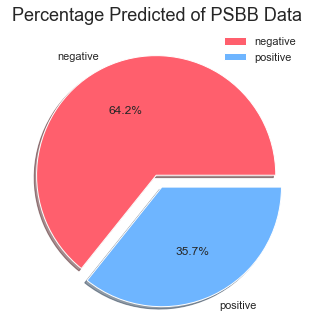

In [514]:
#Tahapan ini digunakan untuk menampilkan hasil data ke visualisasi agar mudah dibaca

#Definisi variabel awal untuk komponen yang digunakan dalam visualisasi
labels = ['negative','positive']
colors = ("#FF5F6D","#6EB5FF")
explode = (0.01,0.1) #explode 1st slice

#Proses plot data ke visualisasi
fig,ax = plt.subplots()
ax.pie(predict_svm.prediction.value_counts(), labels=labels, autopct='%.1f%%', explode=explode, shadow=True, colors=colors)
ax.legend(labels,loc='best')
ax.set_aspect('equal')
plt.title('Percentage Predicted of PSBB Data', fontsize=18,ha='center')
plt.tight_layout
plt.show()

#plt.savefig('pie.png') #untuk menyimpan visualisasi data plot

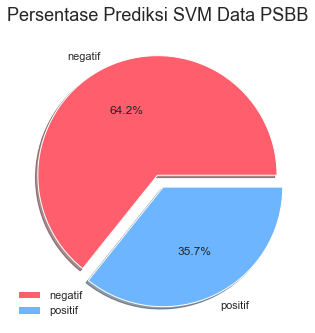

In [484]:
#Tahapan ini digunakan untuk menampilkan hasil data ke visualisasi agar mudah dibaca

#Definisi variabel awal untuk komponen yang digunakan dalam visualisasi
labels = ['negatif','positif']
colors = ("#FF5F6D","#6EB5FF")
explode = (0.01,0.1) #explode 1st slice

#Proses plot data ke visualisasi
fig,ax = plt.subplots()
ax.pie(predict_svm.prediction.value_counts(), labels=labels, autopct='%.1f%%', explode=explode, shadow=True, colors=colors)
ax.legend(labels,loc='best')
ax.set_aspect('equal')
plt.title('Persentase Prediksi SVM Data PSBB', fontsize=18,ha='center')
plt.tight_layout
plt.show()

#plt.savefig('pie.png') #untuk menyimpan visualisasi data plot

In [419]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[251   8]
 [  6 135]]


Sensitivity : 
Semakin tinggi nilai sensitivitas berarti semakin tinggi nilai positif benar dan semakin rendah nilai negatif palsu. Nilai sensitivitas yang lebih rendah berarti nilai positif benar yang lebih rendah dan nilai negatif palsu yang lebih tinggi. Untuk domain kesehatan dan keuangan, model dengan sensitivitas tinggi akan diinginkan.

->Sensitivitas mengukur seberapa sering pengujian dengan benar memberikan hasil yang positif untuk orang-orang yang memiliki kondisi yang sedang diuji (juga dikenal sebagai rasio "positif benar"). Tes yang sangat sensitif akan menandai hampir semua orang yang mengidap penyakit dan tidak menghasilkan banyak hasil negatif palsu. (Contoh: tes dengan sensitivitas 90% akan memberikan hasil positif yang benar untuk 90% orang yang mengidap penyakit, tetapi akan mengembalikan hasil negatif - negatif palsu - untuk 10% orang yang mengidap penyakit dan seharusnya diuji positif.)

===============================================================================================================================

Specifity :
Nilai spesifisitas yang lebih tinggi berarti nilai negatif benar yang lebih tinggi dan rasio positif palsu yang lebih rendah. Nilai spesifisitas yang lebih rendah berarti nilai negatif benar yang lebih rendah dan nilai positif palsu yang lebih tinggi.

->Specifity mengukur kemampuan pengujian untuk menghasilkan hasil negatif dengan benar bagi orang yang tidak memiliki kondisi yang sedang diuji (juga dikenal sebagai rasio "negatif benar"). Tes dengan spesifitas tinggi dengan benar akan menyingkirkan hampir semua orang yang tidak memiliki penyakit dan tidak akan menghasilkan banyak hasil positif palsu. (Contoh: tes dengan spesifisitas 90% akan memberikan hasil negatif yang benar untuk 90% orang yang tidak menderita penyakit, tetapi akan mengembalikan hasil positif - positif palsu - untuk 10% orang yang tidak mengidap penyakit dan seharusnya dites negatif.)

Perbedaan kedua pengukuran :
Pengukuran sensitivitas digunakan untuk menentukan proporsi kasus positif aktual yang diprediksi dengan benar, sedangkan ukuran spesifisitas digunakan untuk menentukan proporsi kasus negatif aktual yang diprediksi dengan benar.

In [420]:
"""
Pengukuran Sensitivitas dan Specificity digunakan untuk memplot kurva ROC. Dan, Area under ROC curve (AUC) digunakan untuk 
menentukan performansi model. Berikut ini adalah kurva ROC yang berbeda dan nilai AOC terkait.
"""
#Fungsi untuk menghitung metrik performa sensitivity dan specificity dalam proses klasifikasi
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_svm == 1) & (actual_pos)
    false_pos = (y_pred_svm == 1) & (actual_neg)
    true_neg = (y_pred_svm == 0) & (actual_neg)
    false_neg = (y_pred_svm == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy_svm = np.mean(y_pred_test == y_test)
    
    # Calculate average score of sensitivity and specificity
    sensitivity_svm = np.sum(true_pos) / np.sum(actual_pos)
    specificity_svm = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity_svm, specificity_svm, accuracy_svm

In [421]:
#Proses perhitungan dengan memanggil fungsi sebelumnya
sensitivity_svm, specificity_svm, accuracy_svm = calculate_sensitivity_specificity(y_test, y_pred_svm)
print ('Sensitivity:', sensitivity_svm)
print ('Specificity:', specificity_svm)
print ('Accuracy:', accuracy_svm)

Sensitivity: 0.9574468085106383
Specificity: 0.9691119691119691
Accuracy: 0.965


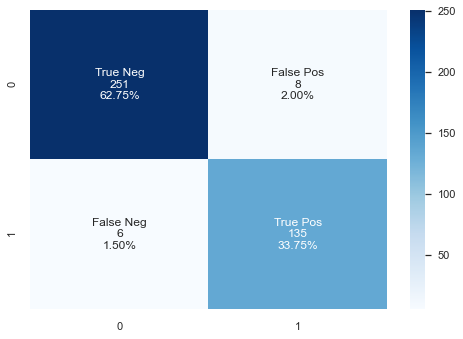

In [422]:
#Visualisasi untuk Confusion Matrix algoritma SVM
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_svm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_svm.flatten()/np.sum(cm_svm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_svm, annot=labels, fmt='', cmap='Blues')

In [423]:
#Visualisasi Confusion Matrix dari model klasifikasi SVM
auc_roc_svm=metrics.roc_auc_score(y_test,y_pred_svm)
auc_roc_svm

0.9632793888113037

In [424]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(false_positive_rate, true_positive_rate)
roc_auc_svm

0.9632793888113037

Text(0.5, 0, 'False Positive Rate')

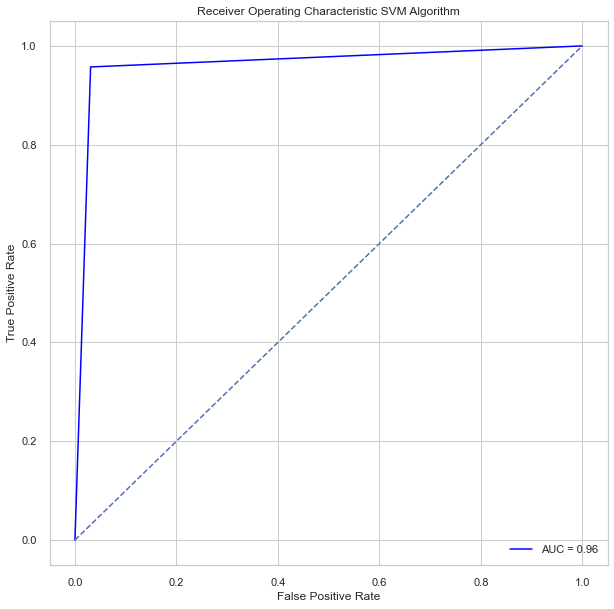

In [425]:
#Import library untuk visualisasi gambar
import matplotlib.pyplot as plt

#Visualisasi Kurva ROC dan AUC
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic SVM Algorithm')
plt.plot(false_positive_rate,true_positive_rate, color='blue',label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### KNN

In [348]:
text_clf_knn = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier())])

tuned_parameters_knn = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
#   'tfidf__use_idf': (True, False),
#   'tfidf__norm': ('l1', 'l2'),
#   'tfidf__smooth_idf': (True, False),
#   'tfidf__sublinear_tf': (True, False),
    'clf__n_neighbors' : [3,4,5,7,8,9,10],
#     n = 9
#   'clf__leaf_size' : np.arange(1,41,8),
#     'clf__p' : [2,3,4,6],
    'clf__weights' :  ['uniform', 'distance'],
    'clf__metric' : ['minkowski', 'chebyshev','euclidean','manhattan'],
#     'clf__n_jobs' : [1, -1]
}

In [349]:
t = time()
#Training the model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
clf_knn = GridSearchCV(text_clf_knn, tuned_parameters_knn, scoring = 'accuracy',cv=cv, n_jobs = -1, return_train_score=True)

#Fit the model
clf_knn.fit(X_train,y_train)


training_time = time() - t

print("train time: %0.3fs" % training_time)

train time: 172.884s


#### pengujian setiap algoritma

In [350]:
print("Best parameters set found on development set:")
print(clf_knn.best_params_)
print("Best Score:", clf_knn.best_score_)
print('\n')

means = clf_knn.cv_results_['mean_test_score']
stds = clf_knn.cv_results_['std_test_score']
params = clf_knn.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean,stdev,param))

Best parameters set found on development set:
{'clf__metric': 'minkowski', 'clf__n_neighbors': 8, 'clf__weights': 'distance', 'tfidf__ngram_range': (1, 3)}
Best Score: 0.9081249999999998


Mean: 0.845625 Stdev:(0.024214) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'uniform', 'tfidf__ngram_range': (1, 1)}
Mean: 0.834375 Stdev:(0.029613) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'uniform', 'tfidf__ngram_range': (1, 2)}
Mean: 0.835625 Stdev:(0.025472) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'uniform', 'tfidf__ngram_range': (1, 3)}
Mean: 0.896250 Stdev:(0.014843) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'distance', 'tfidf__ngram_range': (1, 1)}
Mean: 0.893750 Stdev:(0.022879) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'distance', 'tfidf__ngram_range': (1, 2)}
Mean: 0.896875 Stdev:(0.017733) with: {'clf__metric': 'minkowski', 'clf__n

In [351]:
result_knn = pd.DataFrame(clf_knn.cv_results_['params'])
result_knn['test_score'] = clf_knn.cv_results_['mean_test_score']
result_knn['train_score'] = clf_knn.cv_results_['mean_train_score']
result_knn

,clf__metric,clf__n_neighbors,clf__weights,tfidf__ngram_range,test_score,train_score
0,minkowski,3,uniform,"(1, 1)",0.845625,0.933056
1,minkowski,3,uniform,"(1, 2)",0.834375,0.932569
2,minkowski,3,uniform,"(1, 3)",0.835625,0.932222
3,minkowski,3,distance,"(1, 1)",0.896250,1.000000
4,minkowski,3,distance,"(1, 2)",0.893750,1.000000
...,...,...,...,...,...,...
163,manhattan,10,uniform,"(1, 2)",0.671250,0.713056
164,manhattan,10,uniform,"(1, 3)",0.652500,0.691319
165,manhattan,10,distance,"(1, 1)",0.897500,1.000000
166,manhattan,10,distance,"(1, 2)",0.886250,1.000000


#### model-knn

In [485]:
from sklearn.model_selection import GridSearchCV

t = time()
#training the model
knn = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,3))),
#                 ,norm='l1'
# ,smooth_idf=True,sublinear_tf=True, use_idf=True
#                  ('sampling',ADASYN()),
                ('clf', KNeighborsClassifier(n_neighbors=8, metric='minkowski', weights='distance'))])
# metric='minkowski', n_jobs=1, p=2, weights='distance',

knn.fit(X_train,y_train)

training_time = time() - t

print("train time: %0.3fs" % training_time)

print("================================")
print("Hasil Score data train : ", knn.score(X_train,y_train))
print("Hasil Score data test : ", knn.score(X_test,y_test))

train time: 0.095s
Hasil Score data train :  1.0
Hasil Score data test :  0.93


In [486]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = cv)
print('cross validation score', accuracy)

#compute average cross-validation score
print('Average cross-validation Mean Score : {:.4f}'.format(accuracy.mean()))

#compute average cross-validation score
print('Average cross-validation Std Score : {:.4f}'.format(accuracy.std()))

cross validation score [0.90625 0.89375 0.93125 0.90625 0.89375 0.9     0.9125  0.8875  0.90625
 0.94375]
Average cross-validation Mean Score : 0.9081
Average cross-validation Std Score : 0.0165


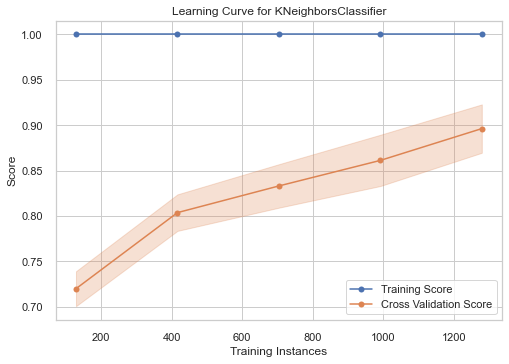

In [428]:
from yellowbrick.model_selection import LearningCurve

# Instantiate the clustering model and visualizer
visualizer = LearningCurve(knn, scoring="accuracy")

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

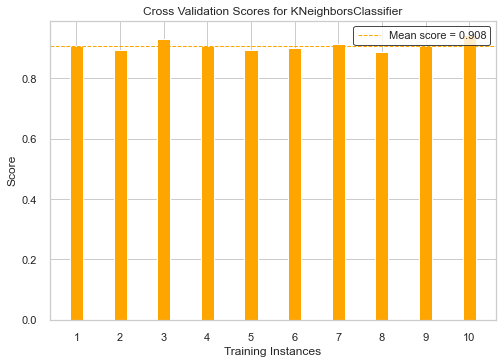

In [429]:
#!pip install yellowbrick

from yellowbrick.model_selection import CVScores
import warnings
warnings.filterwarnings('ignore')

cv = KFold(n_splits=10, shuffle=True, random_state=1)
visualizer = CVScores(knn, cv=cv, scoring='accuracy',color="orange")

visualizer.fit(X_train,y_train)
visualizer.show()

In [487]:
t = time()
#get predictions from model

#get predictions from model
y_pred_knn = knn.predict(X_test)
# y_pred_knn = clf_knn.predict(X_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)
print("========================")

print(classification_report(y_test, y_pred_knn))
print('\n')

#print('BEST KNN MODEL')
print('Accuracy Score - KNN:', metrics.accuracy_score(y_test, y_pred_knn)) 
#print('MAE Score:', mean_absolute_error(y_test, y_pred_knn)) 
#print('MSE Score', mean_squared_error(y_test, y_pred_knn)) 

test time:  0.043s
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       259
           1       0.91      0.89      0.90       141

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.93       400



Accuracy Score - KNN: 0.93


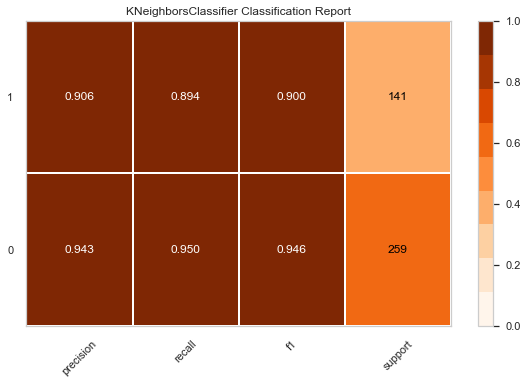

In [431]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(knn,support=True,cmap='Oranges')

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

,negatif,positif,accuracy,macro avg,weighted avg
precision,0.942529,0.906475,0.93,0.924502,0.929820
recall,0.949807,0.893617,0.93,0.921712,0.930000
f1-score,0.946154,0.900000,0.93,0.923077,0.929885
support,259.000000,141.000000,0.93,400.000000,400.000000


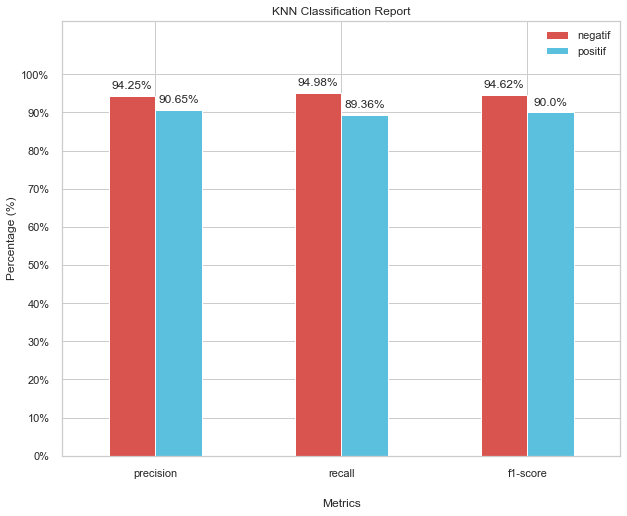

In [488]:
#create labels to be used and columns for a confusion matrix downstream
target_labels = ['negatif', 'positif']

#store the classification report as a dictionary
cr_dict = classification_report(y_test, y_pred_knn, target_names=target_labels, output_dict=True)

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame(cr_dict)
display(cr_data)

#plot the classification report scores
ax = cr_data.iloc[:-1, :2].plot.bar(figsize=(10,8),color=['#d9534f','#5bc0de'])
plt.title("KNN Classification Report")
plt.xlabel('Metrics', labelpad=20)

#fix the x-tick mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Percentage (%)')
plt.margins(0.2,0.2)

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        ha='center',
    )

In [489]:
header_list = ["text","label"]
predict_knn = pd.read_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/pprocessing-2080/2080/data-test_2_pre.csv',names=header_list)
predict_knn["prediction"]=y_pred_knn
predict_knn.head()

#predict_knn.to_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/pprocessing-2080/2080/hasil-prediksi-knn_2-pre.csv',index = False, header=None)

,text,label,prediction
0,psbb arti getar ekonomi dki niat jahat sikm ti...,0,0
1,jerit psbb terap rugi ekonomi segment bro rasa...,0,0
2,pikir bodoh transisi curva landai dampak,0,0
3,psbb total jokowi angguk sehat ekonomi citra a...,0,0
4,netizen pengaruh tidak tuju psbb total gubernu...,0,0


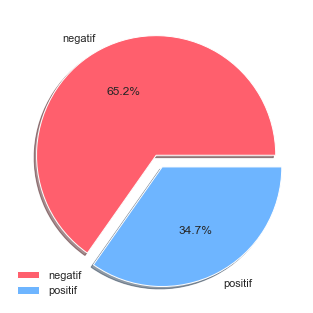

In [490]:
#Data to plot
labels = ['negatif','positif']
colors = ("#FF5F6D","#6EB5FF")
explode = (0.01,0.1) #explode 1st slice

#plot
fig,ax = plt.subplots()
ax.pie(predict_knn.prediction.value_counts(), labels=labels, autopct='%.1f%%', explode=explode, shadow=True, colors=colors)
ax.legend(labels,loc='best')
ax.set_aspect('equal')
plt.tight_layout
plt.show()

#plt.savefig('pie.png')

In [435]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[246  13]
 [ 15 126]]


In [436]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_knn == 1) & (actual_pos)
    false_pos = (y_pred_knn == 1) & (actual_neg)
    true_neg = (y_pred_knn == 0) & (actual_neg)
    false_neg = (y_pred_knn == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy_knn = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity_knn = np.sum(true_pos) / np.sum(actual_pos)
    specificity_knn = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity_knn, specificity_knn, accuracy_knn

In [437]:
sensitivity_knn, specificity_knn, accuracy_knn = calculate_sensitivity_specificity(y_test, y_pred_knn)
print ('Sensitivity:', sensitivity_knn)
print ('Specificity:', specificity_knn)
print ('Accuracy:', accuracy_knn)

Sensitivity: 0.8936170212765957
Specificity: 0.9498069498069498
Accuracy: 0.93


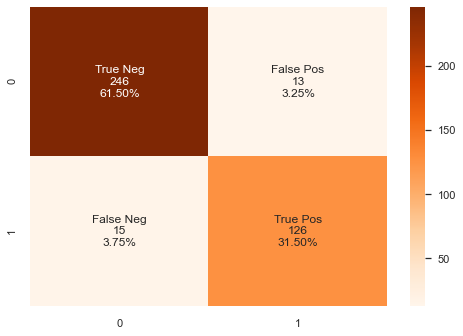

In [438]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_knn.flatten()/np.sum(cm_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_knn, annot=labels, fmt='', cmap='Oranges')

auc_roc=metrics.classification_report(y_test,y_pred_knn)
auc_roc

In [439]:
auc_roc_knn=metrics.roc_auc_score(y_test,y_pred_knn)
auc_roc_knn

0.9217119855417727

In [440]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(false_positive_rate, true_positive_rate)
roc_auc_knn

0.9217119855417727

Text(0.5, 0, 'False Positive Rate')

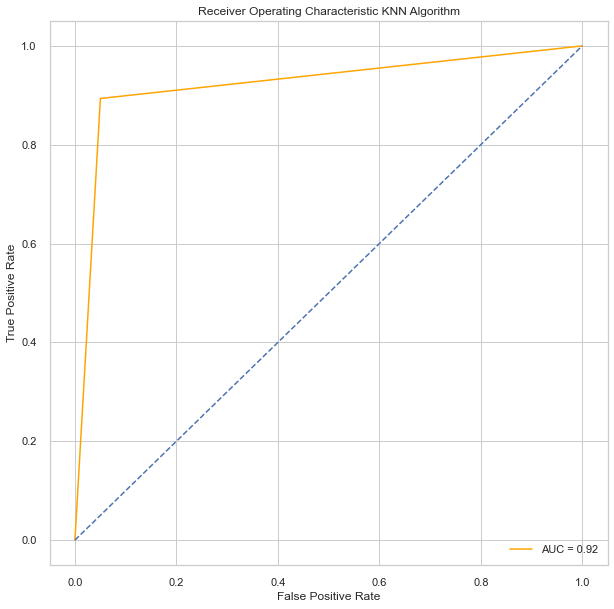

In [441]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic KNN Algorithm')
plt.plot(false_positive_rate,true_positive_rate, color='orange',label = 'AUC = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

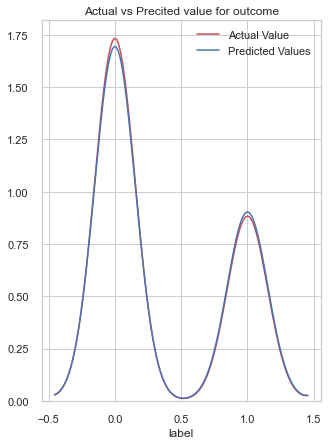

In [518]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))
ax = sns.distplot(data_test['label'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_knn, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for label')
plt.show()
plt.close()

#### Perbandingan Setiap Algoritma

,BNB,SVM,KNN
Accuracy,0.955,0.965,0.93


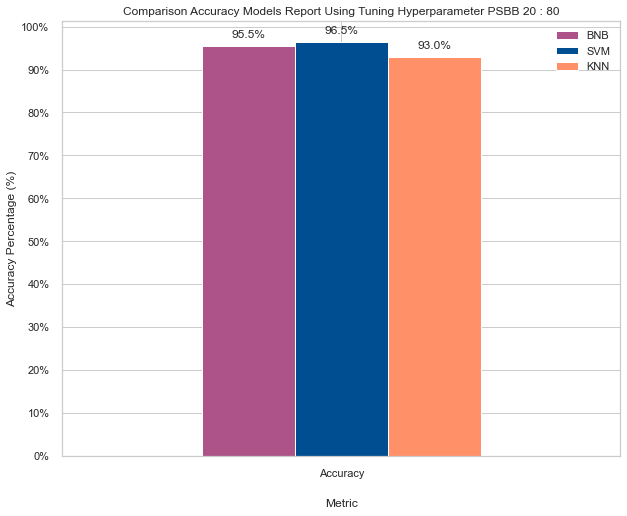

In [491]:
#store the classification report as a dictionary
clf_bnb = metrics.accuracy_score(y_test, y_pred_bnb)
clf_svm = metrics.accuracy_score(y_test, y_pred_svm)
clf_knn = metrics.accuracy_score(y_test, y_pred_knn)
cr_dict = [clf_bnb, clf_svm, clf_knn]

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame({
    "BNB":[clf_bnb],
    "SVM":[clf_svm],
    "KNN":[clf_knn],
},
index = ["Accuracy"])
display(cr_data)

ax = cr_data.plot.bar(figsize=(10,8),color=['#ad5389','#004e92', '#ff9068'])
#plt.bar(cr_data, figsize=(10,8),color=['#5bc0de', '#d8634f'])
plt.title("Comparison Accuracy Models Report Using Tuning Hyperparameter PSBB 20 : 80")
plt.xlabel('Metric', labelpad=20)

#fix the x-tick mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Accuracy Percentage (%)')

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        ha='center')

### COMPARE CLASSIFICATION REPORT

In [492]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#BNB
print("Bernoulli Naive Bayes")
print("--------------------------")
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print('Accuracy: %.3f' % accuracy_bnb)
precision_bnb = precision_score(y_test, y_pred_bnb, average='binary')
print('Precision: %.3f' % precision_bnb)
recall_bnb = recall_score(y_test, y_pred_bnb, average='binary')
print('Recall: %.3f' % recall_bnb)
score_bnb = f1_score(y_test, y_pred_bnb, average='binary')
print('F-Measure: %.3f' % score_bnb)
print("==========================")
#====================
#SVM
print("SVM")
print("--------------------------")
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy: %.3f' % accuracy_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='binary')
print('Precision: %.3f' % precision_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='binary')
print('Recall: %.3f' % recall_svm)
score_svm = f1_score(y_test, y_pred_svm, average='binary')
print('F-Measure: %.3f' % score_svm)
print("==========================")
#====================
#KNN
print("KNN")
print("--------------------------")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy: %.3f' % accuracy_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='binary')
print('Precision: %.3f' % precision_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='binary')
print('Recall: %.3f' % recall_knn)
score_knn = f1_score(y_test, y_pred_knn, average='binary')
print('F-Measure: %.3f' % score_knn)
print("==========================")
#=====================

Bernoulli Naive Bayes
--------------------------
Accuracy: 0.955
Precision: 0.924
Recall: 0.950
F-Measure: 0.937
SVM
--------------------------
Accuracy: 0.965
Precision: 0.944
Recall: 0.957
F-Measure: 0.951
KNN
--------------------------
Accuracy: 0.930
Precision: 0.906
Recall: 0.894
F-Measure: 0.900


### Comparison accuracy not and tuning algorithm

In [371]:
acc_tuning_2080_psbb = [accuracy_bnb,accuracy_svm,accuracy_knn]

In [372]:
import joblib
final_model = acc_tuning_2080_psbb
joblib.dump(final_model, "terbaru-kfold-acc_tuning_2080_psbb.pkl")

['terbaru-kfold-acc_tuning_2080_psbb.pkl']

### Comparison

In [500]:
#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame({
    "BNB":[accuracy_bnb,precision_bnb,recall_bnb,score_bnb],
    "SVM":[accuracy_svm,precision_svm,recall_bnb,score_svm],
    "KNN":[accuracy_knn,precision_knn,recall_bnb,score_knn],
},
index = ["accuracy","precision","recall","f1-score"])
display(cr_data)

,BNB,SVM,KNN
accuracy,0.955000,0.965000,0.930000
precision,0.924138,0.944056,0.906475
recall,0.950355,0.950355,0.950355
f1-score,0.937063,0.950704,0.900000


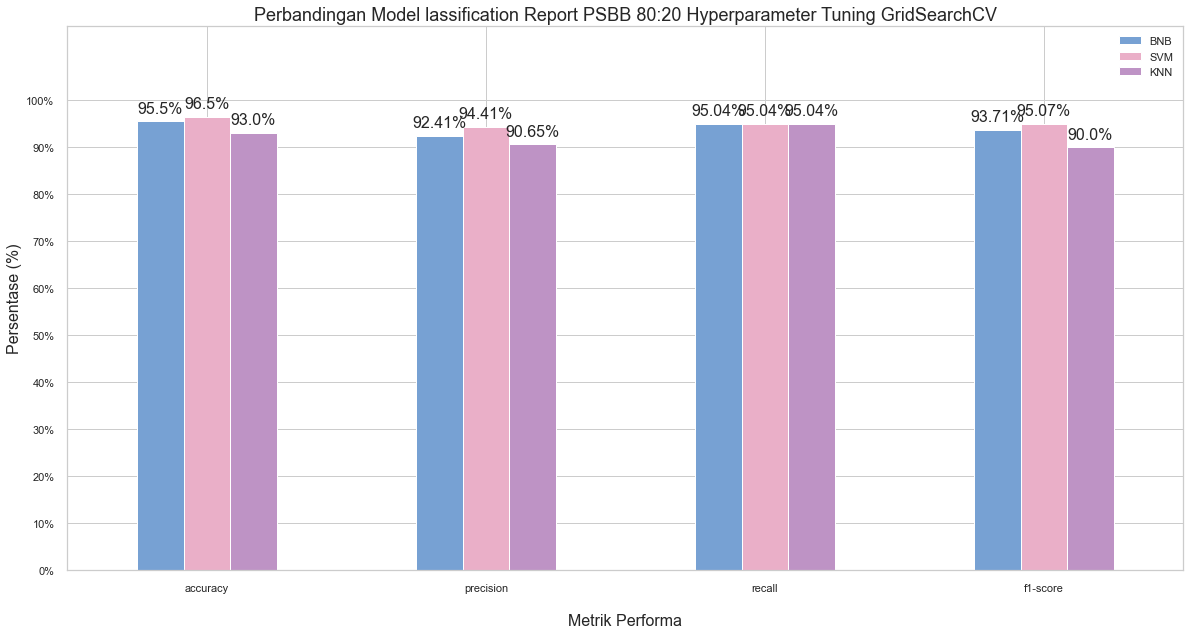

In [501]:
#plot the classification report scores
ax = cr_data.iloc[:, :4].plot.bar(figsize=(20,10),color=['#77A1D3','#eaafc8', '#BE93C5'])
plt.title("Perbandingan Model lassification Report PSBB 80:20 Hyperparameter Tuning GridSearchCV", fontsize=18,ha='center')
plt.xlabel('Metrik Performa', labelpad=20, fontsize=16,ha='center')

#fix the x-tick mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Persentase (%)', fontsize=16,ha='center')
plt.margins(0.2,0.2)

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
         fontsize=16, ha='center',
    )

### COMPARE PREDICTION

In [502]:
#DATA-PREDIKSI-TEST
list_test = test['label']
neg_count_test,pos_count_test= 0, 0
num = 0
# using while loop      
while(num < len(list_test)): 
    # checking condition 
    if list_test[num] == 0: 
        neg_count_test += 1
    else: 
        pos_count_test += 1
    # increment num  
    num += 1
print("DATA-PREDIKSI-TEST")
print("---------------------------")
print("Negative in data label: ", neg_count_test) 
print("Positive in data label: ", pos_count_test)
print("===========================")
#===============================
#DATA-PREDIKSI-BNB
list_bnb = predict_bnb['prediction']
neg_count_bnb,pos_count_bnb= 0, 0
num = 0
# using while loop      
while(num < len(list_bnb)): 
    # checking condition 
    if list_bnb[num] == 0: 
        neg_count_bnb += 1
    else: 
        pos_count_bnb += 1
    # increment num  
    num += 1
print("DATA-PREDIKSI-BNB")
print("---------------------------")
print("Negative in data label: ", neg_count_bnb) 
print("Positive in data label: ", pos_count_bnb)
print("===========================")
#===============================
#DATA-PREDIKSI-SVM
list_svm = predict_svm['prediction']
neg_count_svm,pos_count_svm, = 0, 0
num = 0
# using while loop      
while(num < len(list_svm)): 
    # checking condition 
    if list_svm[num] == 0: 
        neg_count_svm += 1
    else: 
        pos_count_svm += 1
    # increment num  
    num += 1
print("DATA-PREDIKSI-SVM")
print("---------------------------")
print("Negative in data label: ", neg_count_svm) 
print("Positive in data label: ", pos_count_svm)
print("===========================")
#===============================
#DATA-PREDIKSI-KNN
list_knn = predict_knn['prediction']
neg_count_knn,pos_count_knn= 0, 0
num = 0
# using while loop      
while(num < len(list_knn)): 
    # checking condition 
    if list_knn[num] == 0: 
        neg_count_knn += 1
    else: 
        pos_count_knn += 1
    # increment num  
    num += 1
print("DATA-PREDIKSI-KNN")
print("---------------------------")
print("Negative in data label: ", neg_count_knn) 
print("Positive in data label: ", pos_count_knn)
print("===========================")

DATA-PREDIKSI-TEST
---------------------------
Negative in data label:  259
Positive in data label:  141
DATA-PREDIKSI-BNB
---------------------------
Negative in data label:  255
Positive in data label:  145
DATA-PREDIKSI-SVM
---------------------------
Negative in data label:  257
Positive in data label:  143
DATA-PREDIKSI-KNN
---------------------------
Negative in data label:  261
Positive in data label:  139


In [511]:
#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame({
    "DATA-PENGUJIAN": [neg_count_test,pos_count_test],
    "PREDIKSI-BNB":[neg_count_bnb,pos_count_bnb],
    "PREDIKSI-SVM":[neg_count_svm,pos_count_svm],
    "PREDIKSI-KNN":[neg_count_knn,pos_count_knn],
},
index = ["negatif","positif"])
display(cr_data)

,DATA-PENGUJIAN,PREDIKSI-BNB,PREDIKSI-SVM,PREDIKSI-KNN
negatif,259,255,257,261
positif,141,145,143,139


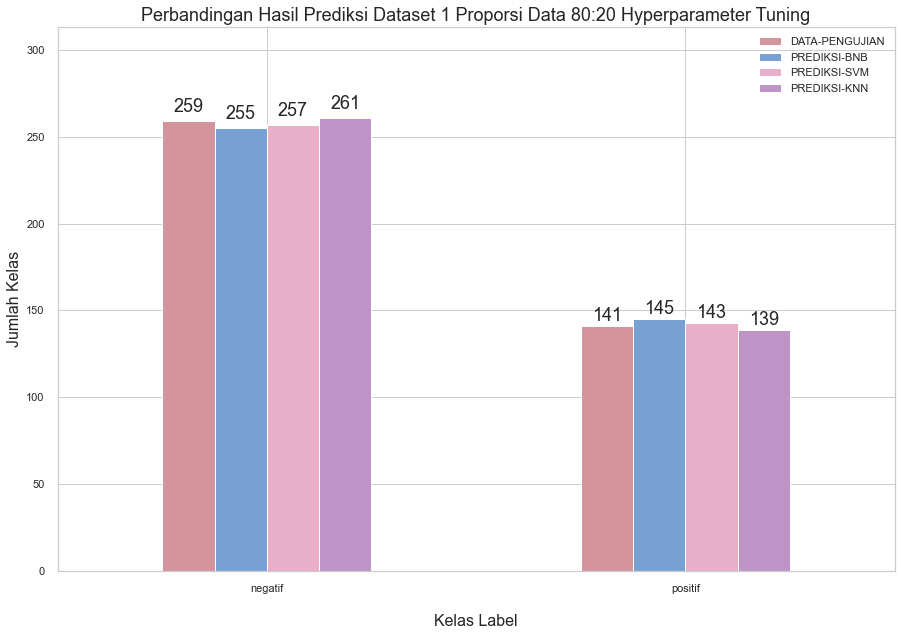

In [512]:
#plot the classification report scores
ax = cr_data.iloc[:, :4].plot.bar(figsize=(15,10),color=['#D3959B','#77A1D3','#eaafc8', '#BE93C5'])
plt.title("Perbandingan Hasil Prediksi Dataset 1 Proporsi Data 80:20 Hyperparameter Tuning", fontsize=18,ha='center')
plt.xlabel('Kelas Label', labelpad=20, fontsize=16,ha='center')

#fix the x-tick mark rotation
plt.xticks(rotation=0)
plt.ylabel('Jumlah Kelas', fontsize=16,ha='center')
plt.margins(0.2,0.2)

for p in ax.patches:
    ax.annotate(
        "{}".format(str(np.round(p.get_height(), 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        fontsize=18, ha='center',
    )

### BACKUP

### PERCOBAAN

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN, SMOTENC, RandomOverSampler
from imblearn.under_sampling import (RandomUnderSampler, 
                                    NearMiss, 
                                    InstanceHardnessThreshold,
                                    CondensedNearestNeighbour,
                                    EditedNearestNeighbours,
                                    RepeatedEditedNearestNeighbours,
                                    AllKNN,
                                    NeighbourhoodCleaningRule,
                                    OneSidedSelection,
                                    TomekLinks)
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline, make_pipeline

In [28]:
text_clf_rf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier())])

tuned_parameters_rf = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
#   'tfidf__use_idf': (True, False),
#   'tfidf__norm': ('l1', 'l2'),
#   'tfidf__smooth_idf': (True, False),
#   'tfidf__sublinear_tf': (True, False),
    'clf__n_estimators' : [50,100,150,200],
    'clf__max_features': ['auto', 'sqrt', 'log2'],
    'clf__max_depth' : [4,5,6,7,8,9,10],
    'clf__criterion' :['gini', 'entropy']
}

In [29]:
#Training the model
#clf_bnb = GridSearchCV(text_clf, tuned_parameters_bnb, scoring = 'accuracy',cv=10, n_jobs = -1, return_train_score=True)
clf_rf = GridSearchCV(text_clf_rf, tuned_parameters_rf, scoring = 'accuracy', cv=10, return_train_score=True)

#Fit the model
clf_rf.fit(X_train,y_train)
#clf_bnb.score(X_test,y_test)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'clf__max_features': ['auto', 'sqrt', 'log2'],
                         'clf__n_estimators': [50, 100, 150, 200],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             return_train_score=True, scoring='accuracy')

In [30]:
print("Best parameters set found on development set:")
print(clf_rf.best_params_)
print("Best Score:", clf_bnb.best_score_)
print('\n')

means = clf_rf.cv_results_['mean_test_score']
stds = clf_rf.cv_results_['std_test_score']
params = clf_rf.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean,stdev,param))
    

Best parameters set found on development set:
{'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__max_features': 'auto', 'clf__n_estimators': 50, 'tfidf__ngram_range': (1, 1)}
Best Score: 0.9324999999999999


Mean: 0.638750 Stdev:(0.010383) with: {'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__max_features': 'auto', 'clf__n_estimators': 50, 'tfidf__ngram_range': (1, 1)}
Mean: 0.628125 Stdev:(0.004193) with: {'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__max_features': 'auto', 'clf__n_estimators': 50, 'tfidf__ngram_range': (1, 2)}
Mean: 0.628750 Stdev:(0.004146) with: {'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__max_features': 'auto', 'clf__n_estimators': 50, 'tfidf__ngram_range': (1, 3)}
Mean: 0.637500 Stdev:(0.007906) with: {'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__max_features': 'auto', 'clf__n_estimators': 100, 'tfidf__ngram_range': (1, 1)}
Mean: 0.631875 Stdev:(0.007099) with: {'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__max_features': 

In [22]:
result_rf = pd.DataFrame(clf_rf.cv_results_['params'])
result_rf['test_score'] = clf_rf.cv_results_['mean_test_score']
result_rf['train_score'] = clf_rf.cv_results_['mean_train_score']
result_rf

,clf__criterion,clf__max_depth,clf__max_features,tfidf__ngram_range,test_score,train_score
0,gini,4,auto,"(1, 1)",0.640625,0.643333
1,gini,4,auto,"(1, 2)",0.628750,0.632847
2,gini,4,auto,"(1, 3)",0.625000,0.631528
3,gini,4,sqrt,"(1, 1)",0.635625,0.645972
4,gini,4,sqrt,"(1, 2)",0.627500,0.632639
5,gini,4,sqrt,"(1, 3)",0.626250,0.630208
6,gini,4,log2,"(1, 1)",0.625000,0.625000
7,gini,4,log2,"(1, 2)",0.625000,0.625000
8,gini,4,log2,"(1, 3)",0.625000,0.625000
9,gini,5,auto,"(1, 1)",0.655000,0.669792


In [84]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

t = time()

#training the model
rf = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,1))),
#                  ,norm='l1'),
                    ('sampling',RandomOverSampler(random_state=777)),
                     ('clf', RandomForestClassifier(criterion= 'gini', max_depth= 10, max_features= 'auto', n_estimators=50))])
# ,smooth_idf=True,sublinear_tf=True, use_idf=True

rf.fit(X_train,y_train)
# bnb.score(X_test,y_test)

training_time = time() - t

print("train time: %0.3fs" % training_time)

print("================================")

train time: 0.194s


In [85]:
accuracy = cross_val_score(rf, X_train, y_train, scoring = 'accuracy', cv = 10)
print('cross validation score', accuracy)

#compute average cross-validation score
print('Average cross-validation Mean Score : {:.4f}'.format(accuracy.mean()))

#compute average cross-validation score
print('Average cross-validation Std Score : {:.4f}'.format(accuracy.std()))

cross validation score [0.83125 0.8625  0.85    0.875   0.875   0.85625 0.84375 0.8875  0.8625
 0.8125 ]
Average cross-validation Mean Score : 0.8556
Average cross-validation Std Score : 0.0212


In [86]:
t = time()
#get predictions from model
# y_pred_bnb = clf_bnb.predict(X_test)
y_pred_rf = rf.predict(X_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)
print("========================")

print(classification_report(y_test, y_pred_rf))
print('\n')

#print('BEST RANDOM FOREST MODEL')
print('Accuracy Score - Random Forest:', metrics.accuracy_score(y_test, y_pred_rf)) 

# tidak digunakan karna penelitian ini menggunakan klasifikasi bukan regresi,
# mae dan mse digunakan jika ingin menggunakan regresi, untuk hitung error dari continues variable
# print('MAE Score:', mean_absolute_error(y_test, y_pred_bnb)) 
# print('MSE Score', mean_squared_error(y_test, y_pred_bnb))

test time:  0.021s
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       259
           1       0.80      0.79      0.80       141

    accuracy                           0.86       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.86      0.86      0.86       400



Accuracy Score - Random Forest: 0.8575


,negatif,positif,accuracy,macro avg,weighted avg
precision,0.740634,0.962264,0.77,0.851449,0.818759
recall,0.992278,0.361702,0.77,0.676990,0.770000
f1-score,0.848185,0.525773,0.77,0.686979,0.734535
support,259.000000,141.000000,0.77,400.000000,400.000000


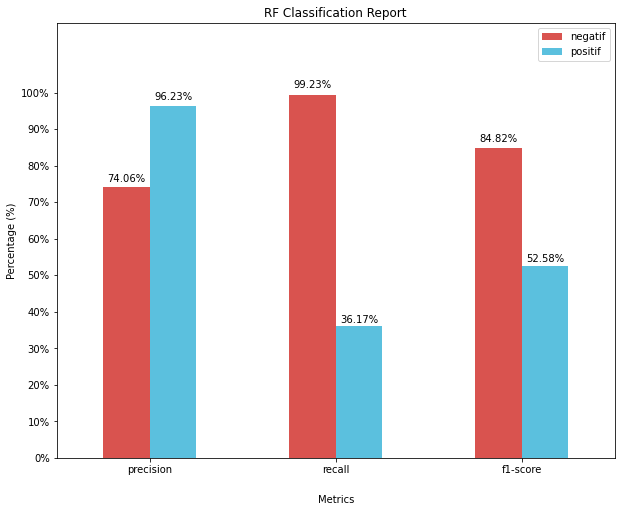

In [36]:
import matplotlib.pyplot as plt

#create labels to be used and columns for a confusion matrix downstream
target_labels = ['negatif', 'positif']

#store the classification report as a dictionary
cr_dict = classification_report(y_test, y_pred_rf, target_names=target_labels, output_dict=True)

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame(cr_dict)
display(cr_data)

#plot the classification report scores
ax=cr_data.iloc[:-1, :2].plot.bar(figsize=(10,8),color=['#d9534f','#5bc0de'])
plt.title("RF Classification Report")
plt.xlabel('Metrics', labelpad=20)

#fix the x-tick mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Percentage (%)')
plt.margins(0.2,0.2)

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        ha='center',
    )

In [46]:
text_clf_dt = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', DecisionTreeClassifier())])

tuned_parameters_dt = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
#   'tfidf__use_idf': (True, False),
#   'tfidf__norm': ('l1', 'l2'),
#   'tfidf__smooth_idf': (True, False),
#   'tfidf__sublinear_tf': (True, False),
     'clf__max_features': ['auto', 'sqrt', 'log2'],
     'clf__max_depth' : [4,5,6,7,8,9,10],
    'clf__criterion' :['gini', 'entropy']
}

In [47]:
#Training the model
#clf_bnb = GridSearchCV(text_clf, tuned_parameters_bnb, scoring = 'accuracy',cv=10, n_jobs = -1, return_train_score=True)
clf_dt = GridSearchCV(text_clf_dt, tuned_parameters_dt, scoring = 'accuracy', cv=10, return_train_score=True)

#Fit the model
clf_dt.fit(X_train,y_train)
#clf_bnb.score(X_test,y_test)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'clf__max_features': ['auto', 'sqrt', 'log2'],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             return_train_score=True, scoring='accuracy')

In [48]:
print("Best parameters set found on development set:")
print(clf_dt.best_params_)
print("Best Score:", clf_dt.best_score_)
print('\n')

means = clf_dt.cv_results_['mean_test_score']
stds = clf_dt.cv_results_['std_test_score']
params = clf_dt.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean,stdev,param))

Best parameters set found on development set:
{'clf__criterion': 'entropy', 'clf__max_depth': 9, 'clf__max_features': 'auto', 'tfidf__ngram_range': (1, 1)}
Best Score: 0.6987499999999999


Mean: 0.660000 Stdev:(0.029208) with: {'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__max_features': 'auto', 'tfidf__ngram_range': (1, 1)}
Mean: 0.644375 Stdev:(0.016642) with: {'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__max_features': 'auto', 'tfidf__ngram_range': (1, 2)}
Mean: 0.649375 Stdev:(0.019853) with: {'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__max_features': 'auto', 'tfidf__ngram_range': (1, 3)}
Mean: 0.646250 Stdev:(0.013750) with: {'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__max_features': 'sqrt', 'tfidf__ngram_range': (1, 1)}
Mean: 0.643125 Stdev:(0.017995) with: {'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__max_features': 'sqrt', 'tfidf__ngram_range': (1, 2)}
Mean: 0.641250 Stdev:(0.018583) with: {'clf__criterion': 'gini', 'clf__max_depth': 4, 

In [49]:
result_dt = pd.DataFrame(clf_dt.cv_results_['params'])
result_dt['test_score'] = clf_dt.cv_results_['mean_test_score']
result_dt['train_score'] = clf_dt.cv_results_['mean_train_score']
result_dt

,clf__criterion,clf__max_depth,clf__max_features,tfidf__ngram_range,test_score,train_score
0,gini,4,auto,"(1, 1)",0.660000,0.664861
1,gini,4,auto,"(1, 2)",0.644375,0.649444
2,gini,4,auto,"(1, 3)",0.649375,0.654028
3,gini,4,sqrt,"(1, 1)",0.646250,0.656181
4,gini,4,sqrt,"(1, 2)",0.643125,0.648472
...,...,...,...,...,...,...
121,entropy,10,sqrt,"(1, 2)",0.664375,0.703264
122,entropy,10,sqrt,"(1, 3)",0.660000,0.685417
123,entropy,10,log2,"(1, 1)",0.643125,0.659583
124,entropy,10,log2,"(1, 2)",0.633125,0.652083


In [53]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

t = time()

#training the model
dt = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,1))),
#                  ,norm='l1')
                     ('clf', DecisionTreeClassifier(criterion= 'entropy', max_depth= 9, max_features= 'auto'))])
# ,smooth_idf=True,sublinear_tf=True, use_idf=True

dt.fit(X_train,y_train)
# bnb.score(X_test,y_test)

training_time = time() - t

print("train time: %0.3fs" % training_time)

print("================================")


train time: 0.032s


In [54]:
accuracy = cross_val_score(rf, X_train, y_train, scoring = 'accuracy', cv = 10)
print('cross validation score', accuracy)

#compute average cross-validation score
print('Average cross-validation Mean Score : {:.4f}'.format(accuracy.mean()))

#compute average cross-validation score
print('Average cross-validation Std Score : {:.4f}'.format(accuracy.std()))

cross validation score [0.68125 0.65625 0.68125 0.71875 0.6375  0.6625  0.6625  0.71875 0.70625
 0.69375]
Average cross-validation Mean Score : 0.6819
Average cross-validation Std Score : 0.0261


In [55]:
t = time()
#get predictions from model
# y_pred_bnb = clf_bnb.predict(X_test)
y_pred_dt = dt.predict(X_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)
print("========================")

print(classification_report(y_test, y_pred_dt))
print('\n')

#print('BEST DECISION TREE MODEL')
print('Accuracy Score - Decision Tree:', metrics.accuracy_score(y_test, y_pred_dt)) 

# tidak digunakan karna penelitian ini menggunakan klasifikasi bukan regresi,
# mae dan mse digunakan jika ingin menggunakan regresi, untuk hitung error dari continues variable
# print('MAE Score:', mean_absolute_error(y_test, y_pred_bnb)) 
# print('MSE Score', mean_squared_error(y_test, y_pred_bnb))

test time:  0.007s
              precision    recall  f1-score   support

           0       0.69      0.99      0.82       259
           1       0.93      0.19      0.32       141

    accuracy                           0.71       400
   macro avg       0.81      0.59      0.57       400
weighted avg       0.78      0.71      0.64       400



Accuracy Score - Decision Tree: 0.71


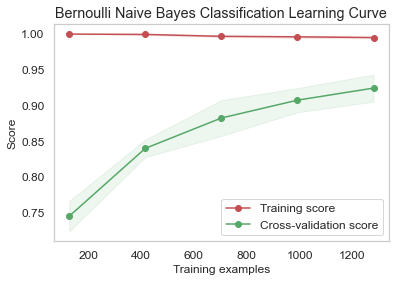

In [25]:
#!pip install scikit-plot 
import scikitplot as skplt
#load from file and predict using the best configs found in the CV step
skplt.estimators.plot_learning_curve(bnb, X_train, y_train, scoring="accuracy", n_jobs=-1, figsize=(6,4),
                                    title="Bernoulli Naive Bayes Classification Learning Curve")

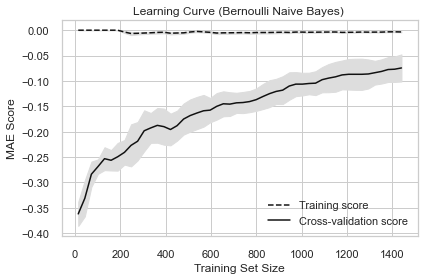

In [1215]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(bnb,
                                                       X_train,
                                                       y_train,
                                                       #Number of folds in cross-validatabsion
                                                       cv=10,
                                                       #Evaluation metric
                                                       scoring='neg_mean_absolute_error',
                                                       #Use all computer cores
                                                       n_jobs=-1,
                                                       #50 different sizes of the training set
                                                       train_sizes=np.linspace(0.01,1.0,50))

#Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Create means and standars deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Draw lines
plt.plot(train_sizes, train_mean,'--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

#Draw bands
plt.fill_between(train_sizes,train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes,test_mean - test_std, test_mean + test_std, color="#DDDDDD")

#Create plot
plt.title("Learning Curve (Bernoulli Naive Bayes) ")
plt.xlabel("Training Set Size"),plt.ylabel("MAE Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

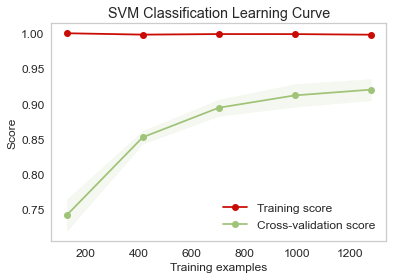

In [49]:
#!pip install scikit-plot 
import scikitplot as skplt
#load from file and predict using the best configs found in the CV step
skplt.estimators.plot_learning_curve(svm, X_train, y_train, scoring="accuracy", n_jobs=-1, figsize=(6,4),
                                    title="SVM Classification Learning Curve")

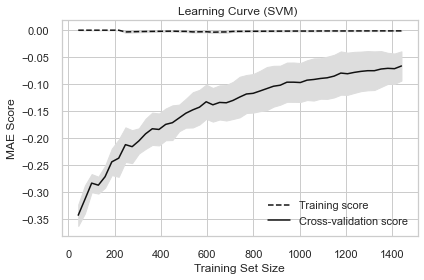

In [1263]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(svm,
                                                       X_train,
                                                       y_train,
                                                       #Number of folds in cross-validatabsion
                                                       cv=10,
                                                       #Evaluation metric
                                                       scoring='neg_mean_absolute_error',
                                                       #Use all computer cores
                                                       n_jobs=-1,
                                                       #50 different sizes of the training set
                                                       train_sizes=np.linspace(0.01,1.0,50))

#Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Create means and standars deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Draw lines
plt.plot(train_sizes, train_mean,'--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

#Draw bands
plt.fill_between(train_sizes,train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes,test_mean - test_std, test_mean + test_std, color="#DDDDDD")

#Create plot
plt.title("Learning Curve (SVM) ")
plt.xlabel("Training Set Size"),plt.ylabel("MAE Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

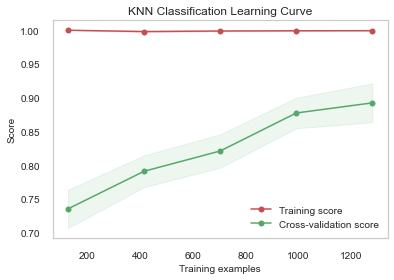

In [1355]:
#!pip install scikit-plot 
import scikitplot as skplt
#load from file and predict using the best configs found in the CV step
skplt.estimators.plot_learning_curve(knn, X_train, y_train, scoring="accuracy", n_jobs=-1, figsize=(6,4),
                                    title="KNN Classification Learning Curve")

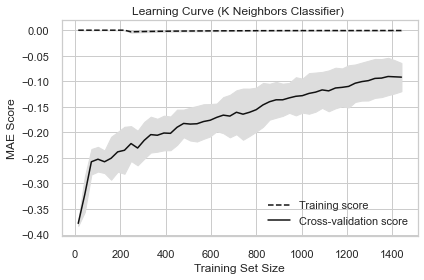

In [1356]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(knn,
                                                       X_train,
                                                       y_train,
                                                       #Number of folds in cross-validatabsion
                                                       cv=10,
                                                       #Evaluation metric
                                                       scoring='neg_mean_absolute_error',
                                                       #Use all computer cores
                                                       n_jobs=-1,
                                                       #50 different sizes of the training set
                                                       train_sizes=np.linspace(0.01,1.0,50))

#Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Create means and standars deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Draw lines
plt.plot(train_sizes, train_mean,'--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

#Draw bands
plt.fill_between(train_sizes,train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes,test_mean - test_std, test_mean + test_std, color="#DDDDDD")

#Create plot
plt.title("Learning Curve (K Neighbors Classifier) ")
plt.xlabel("Training Set Size"),plt.ylabel("MAE Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [109]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(svm, title, X_train, y_train, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(svm, X_train, y_train, cv=10,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

#estimator = GaussianNB()
plot_learning_curve(bnb, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=10)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
plot_learning_curve(svm, title, X_train, y_train, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=10)

plt.show()

IndentationError: unexpected indent (<ipython-input-109-d593eec7d882>, line 85)

Automatically created module for IPython interactive environment


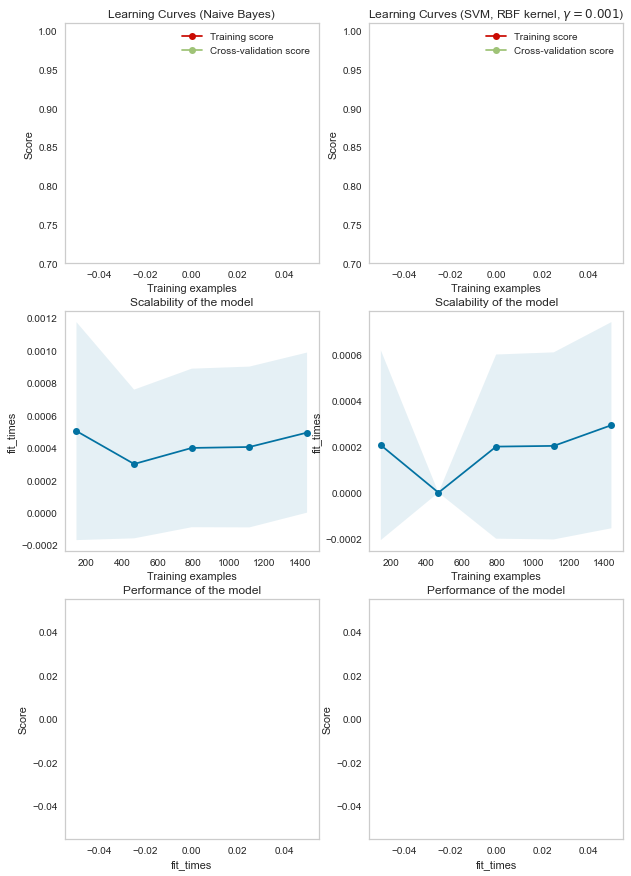

In [105]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X_train, y_train, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X_train, y_train, cv=10,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = BernoulliNB()
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=10)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC()
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=10)

plt.show()